<a href="https://colab.research.google.com/github/MiguelAmorim-587/ZenPrice/blob/main/DimensionalityReduction_Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Extraction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Drive path
%cd "/content/drive/MyDrive/Tese"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Tese


In [ ]:
# Base libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 5)

# Convert currencies
!pip install currencyconverter
from currency_converter import CurrencyConverter

# Conver strings with commas as thousand separators
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') 

# Convert datatimes
from datetime import datetime

# Read zips
from zipfile import ZipFile

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




*   Extração da Matriz com os produtos sem duplicado



In [ ]:
df5 = pd.read_csv("/content/drive/MyDrive/Tese/Final/df5.csv") 
df5

,Unnamed: 0,ID,product,country,company,timestamp,offer_type,price_euro
0,80,1,xiaomi Pocophone 128GB,CL,Falabella,2020-04-14,unlocked,727.726735
1,781,2,xiaomi Redmi Note 8 128GB,CO,Movistar,2021-01-22,unlocked,636.723369
2,432,3,xiaomi Redmi Note 8 128GB,CO,Tigo,2021-05-31,postpaid_new_line,600.291094
3,429,4,xiaomi Redmi Note 8 128GB,CO,wom,2021-06-01,unlocked,636.677886
4,337,5,xiaomi Redmi Note 8 128GB,CO,Claro,2021-07-03,unlocked,684.890385
...,...,...,...,...,...,...,...,...
2757,599597,2758,huawei Y9S 128GB,CL,wom,2020-12-22,postpaid_new_line,212.862731
2758,602055,2759,huawei Y9S 128GB,PE,Claro,2020-06-20,unlocked,273.360000
2759,602052,2760,huawei Y9S 128GB,CO,Claro,2020-06-21,unlocked,1063.313017
2760,602046,2761,huawei Y9S 128GB,PE,Falabella,2020-06-21,unlocked,335.760000


In [ ]:
df5=df5.drop(columns=['Unnamed: 0'])
df5

,ID,product,country,company,timestamp,offer_type,price_euro
0,1,xiaomi Pocophone 128GB,CL,Falabella,2020-04-14,unlocked,727.726735
1,2,xiaomi Redmi Note 8 128GB,CO,Movistar,2021-01-22,unlocked,636.723369
2,3,xiaomi Redmi Note 8 128GB,CO,Tigo,2021-05-31,postpaid_new_line,600.291094
3,4,xiaomi Redmi Note 8 128GB,CO,wom,2021-06-01,unlocked,636.677886
4,5,xiaomi Redmi Note 8 128GB,CO,Claro,2021-07-03,unlocked,684.890385
...,...,...,...,...,...,...,...
2757,2758,huawei Y9S 128GB,CL,wom,2020-12-22,postpaid_new_line,212.862731
2758,2759,huawei Y9S 128GB,PE,Claro,2020-06-20,unlocked,273.360000
2759,2760,huawei Y9S 128GB,CO,Claro,2020-06-21,unlocked,1063.313017
2760,2761,huawei Y9S 128GB,PE,Falabella,2020-06-21,unlocked,335.760000




*   Extração de todas as Features 



In [ ]:
all_features = pd.read_csv("/content/drive/MyDrive/Tese/Final/all_features.csv") 

In [ ]:
all_features

,Unnamed: 0,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,0_Wavelet standard deviation_8,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8
0,0,1164.362776,4.289648e+07,0.800000,727.726735,727.726735,727.726735,727.726735,0.012346,0.024691,...,419.753894,4743.853666,16096.582474,33283.966509,54824.133297,79255.073381,105118.581397,130957.248417,155313.906196,176193.331756
1,1,3487.244037,1.091783e+08,2.728929,56.000000,224.000000,591.184390,636.723369,0.003559,0.007117,...,256.154800,1045.266512,3723.860893,8096.916486,14085.904264,21598.996534,30566.436184,40947.950179,52671.403019,65615.281732
2,2,1507.008096,4.876461e+07,1.226211,23.000000,95.000000,591.194396,684.890385,0.008403,0.016807,...,379.271274,2723.354430,9477.926457,20120.469052,34113.940571,51003.018692,70578.446551,92795.992478,117427.339305,143846.699549
3,3,658.700992,2.070793e+07,0.488866,11.000000,44.000000,381.970345,684.890385,0.017857,0.035714,...,333.528828,4825.581085,16238.101497,29429.311237,38674.323394,51672.753635,70116.781661,88410.170696,101954.991546,111241.479394
4,4,295.084144,1.034271e+07,0.213100,4.000000,18.000000,636.677886,684.890385,0.043478,0.086957,...,334.717938,12285.093156,31476.442874,40366.014766,41077.280361,42347.708707,53285.024793,72181.067498,93172.150980,112036.098316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,2757,200.090967,2.174906e+06,0.470000,212.862731,212.862731,212.862731,212.862731,0.020833,0.041667,...,101.284721,663.429796,2135.456661,4160.910228,6380.996792,8440.020751,9990.824818,10766.236113,10750.871297,10258.594638
2758,2758,890.683200,1.377810e+07,1.370436,29.000000,117.000000,275.760000,338.160000,0.006803,0.013605,...,150.909722,422.901059,1430.357451,2704.411969,4753.468142,7957.095709,11892.713908,15921.208882,19595.896023,22773.744307
2759,2759,3943.695079,1.935120e+08,1.881606,40.000000,163.000000,881.379059,998.726462,0.004902,0.009804,...,468.071918,3826.091662,13142.837044,28425.454557,49725.565931,75960.531607,106174.287108,140012.797196,177527.140938,219091.320312
2760,2760,429.772800,7.327761e+06,0.640000,335.760000,335.760000,335.760000,335.760000,0.015385,0.030769,...,187.943610,1244.281047,4145.942142,8405.276870,13533.902168,19048.828255,24468.088118,29169.425434,32951.488636,35322.800497


In [ ]:
all_features=all_features.drop(columns=['Unnamed: 0'])
all_features

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,0_ECDF_2,...,0_Wavelet standard deviation_8,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8
0,1164.362776,4.289648e+07,0.800000,727.726735,727.726735,727.726735,727.726735,0.012346,0.024691,0.037037,...,419.753894,4743.853666,16096.582474,33283.966509,54824.133297,79255.073381,105118.581397,130957.248417,155313.906196,176193.331756
1,3487.244037,1.091783e+08,2.728929,56.000000,224.000000,591.184390,636.723369,0.003559,0.007117,0.010676,...,256.154800,1045.266512,3723.860893,8096.916486,14085.904264,21598.996534,30566.436184,40947.950179,52671.403019,65615.281732
2,1507.008096,4.876461e+07,1.226211,23.000000,95.000000,591.194396,684.890385,0.008403,0.016807,0.025210,...,379.271274,2723.354430,9477.926457,20120.469052,34113.940571,51003.018692,70578.446551,92795.992478,117427.339305,143846.699549
3,658.700992,2.070793e+07,0.488866,11.000000,44.000000,381.970345,684.890385,0.017857,0.035714,0.053571,...,333.528828,4825.581085,16238.101497,29429.311237,38674.323394,51672.753635,70116.781661,88410.170696,101954.991546,111241.479394
4,295.084144,1.034271e+07,0.213100,4.000000,18.000000,636.677886,684.890385,0.043478,0.086957,0.130435,...,334.717938,12285.093156,31476.442874,40366.014766,41077.280361,42347.708707,53285.024793,72181.067498,93172.150980,112036.098316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,200.090967,2.174906e+06,0.470000,212.862731,212.862731,212.862731,212.862731,0.020833,0.041667,0.062500,...,101.284721,663.429796,2135.456661,4160.910228,6380.996792,8440.020751,9990.824818,10766.236113,10750.871297,10258.594638
2758,890.683200,1.377810e+07,1.370436,29.000000,117.000000,275.760000,338.160000,0.006803,0.013605,0.020408,...,150.909722,422.901059,1430.357451,2704.411969,4753.468142,7957.095709,11892.713908,15921.208882,19595.896023,22773.744307
2759,3943.695079,1.935120e+08,1.881606,40.000000,163.000000,881.379059,998.726462,0.004902,0.009804,0.014706,...,468.071918,3826.091662,13142.837044,28425.454557,49725.565931,75960.531607,106174.287108,140012.797196,177527.140938,219091.320312
2760,429.772800,7.327761e+06,0.640000,335.760000,335.760000,335.760000,335.760000,0.015385,0.030769,0.046154,...,187.943610,1244.281047,4145.942142,8405.276870,13533.902168,19048.828255,24468.088118,29169.425434,32951.488636,35322.800497


In [ ]:
def shuffle(df, n=1, axis=0):     
  df = df.copy()
  for _ in range(n):
    df.apply(np.random.shuffle, axis=axis)
    return df

In [ ]:
all_features_shuffled = shuffle(all_features)

/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)


In [ ]:
all_features_shuffled

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,0_ECDF_2,...,0_Wavelet standard deviation_8,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8
0,1796.992268,5.655152e+06,2.855252,7.000000,318.375330,1169.900000,1249.990000,0.003937,0.013333,0.004458,...,321.582628,3.151592,8.688344e+03,2131.016738,56178.660400,5318.196479,38863.978369,48266.971966,97601.565538,2.496109e+06
1,153.388200,3.204729e+06,2.707459,26.000000,212.000000,278.160000,699.000000,0.010101,0.008475,0.039474,...,1127.189853,798.044781,3.192615e+03,399.854501,17299.101695,203912.626073,472810.935547,14289.533662,378.562522,1.690827e+04
2,1531.746202,1.030407e+08,4.647214,39.000000,59.000000,436.632402,618.566360,0.058824,0.028169,0.008982,...,203.868708,451.955237,9.793778e+02,22373.767398,12203.016526,6038.896209,83889.715216,20305.797564,1496.316890,7.276234e+04
3,352.475200,6.645235e+06,0.948267,64.000000,201.000000,127.344674,239.990000,0.006211,0.083333,0.021739,...,425.369811,163.082108,1.622434e+06,31506.164185,36434.736459,20205.337980,89698.222884,5682.268132,10308.598402,5.967072e+04
4,2236.473392,2.502116e+08,0.486795,108.000000,89.000000,203.756936,409.342309,0.005780,0.068966,0.024590,...,183.727786,20772.492461,4.881095e+02,1171.001904,186.205996,4355.213317,1649.929114,90999.442147,5279.858367,3.166485e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,294.802200,9.323312e+06,2.593566,8.000000,154.634768,1000.627672,300.181934,0.005291,0.062500,0.017045,...,92.409577,354.415806,2.114393e+02,1067.520643,4267.084088,4803.804001,8338.840942,180823.359171,6997.873235,1.713907e+03
2758,1154.609479,1.036674e+08,2.558939,37.000000,72.764486,77.312835,63.667789,0.050000,0.009569,0.005587,...,13.413030,1211.369317,1.264083e+05,3949.541379,111457.706246,4422.505825,139.522591,115369.772121,3558.987050,1.551102e+05
2759,575.668152,3.071988e+05,0.150000,10.000000,1364.495588,829.990000,699.990000,0.003125,0.016260,0.032609,...,643.257122,73.720078,3.687635e+03,14588.941264,265399.050940,10610.840729,2536.006479,2160.543205,40189.234412,1.759552e+03
2760,1323.461112,1.445138e+06,1.261112,83.760000,87.000000,536.696079,127.344674,0.013889,0.008368,0.057692,...,174.645911,714.402346,1.365628e+03,869.461624,14405.122012,8455.724758,9120.654651,47216.333443,3939.909972,3.595421e+05




*   Normalização de all_features



In [ ]:
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(all_features)
scaled_all_features=scaling.transform(all_features)



*   Normalização de all_features_shuffled



In [ ]:
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(all_features_shuffled)
scaled_all_features_shuffled=scaling.transform(all_features_shuffled)

## All Features

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import collections
import os
#print(os.listdir("../input"))

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train = scaled_all_features
train.shape

(2762, 132)

In [ ]:
train1 = pd.DataFrame(train)
train1

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,-0.029878,-0.019448,-0.807088,1.485474,1.259949,0.237859,-0.018923,0.182489,0.182489,0.182489,...,-0.023389,-0.024855,-0.023594,-0.022784,-0.022041,-0.021403,-0.020718,-0.020131,-0.019733,-0.019503
1,-0.017314,-0.019448,0.409309,-0.318526,-0.141408,0.055488,-0.019408,-0.585179,-0.585179,-0.585179,...,-0.024556,-0.024855,-0.023594,-0.022784,-0.022041,-0.021403,-0.020719,-0.020131,-0.019733,-0.019503
2,-0.028025,-0.019448,-0.538316,-0.407152,-0.500284,0.055501,-0.019151,-0.161929,-0.161929,-0.161929,...,-0.023678,-0.024855,-0.023594,-0.022784,-0.022041,-0.021403,-0.020718,-0.020131,-0.019733,-0.019503
3,-0.032613,-0.019449,-1.003291,-0.439379,-0.642165,-0.223946,-0.019151,0.663995,0.663995,0.663995,...,-0.024004,-0.024855,-0.023594,-0.022784,-0.022041,-0.021403,-0.020718,-0.020131,-0.019733,-0.019503
4,-0.034579,-0.019449,-1.177191,-0.458178,-0.714496,0.116251,-0.019151,2.902369,2.902369,2.902369,...,-0.023996,-0.024854,-0.023594,-0.022784,-0.022041,-0.021403,-0.020719,-0.020131,-0.019733,-0.019503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,-0.035093,-0.019449,-1.015188,0.102747,-0.172392,-0.449813,-0.021667,0.924008,0.924008,0.924008,...,-0.025661,-0.024855,-0.023594,-0.022784,-0.022041,-0.021403,-0.020719,-0.020131,-0.019733,-0.019504
2758,-0.031358,-0.019449,-0.447367,-0.391038,-0.439080,-0.365805,-0.020999,-0.301768,-0.301768,-0.301768,...,-0.025307,-0.024855,-0.023594,-0.022784,-0.022041,-0.021403,-0.020719,-0.020131,-0.019733,-0.019503
2759,-0.014845,-0.019447,-0.125019,-0.361496,-0.311109,0.443084,-0.017478,-0.467827,-0.467827,-0.467827,...,-0.023045,-0.024855,-0.023594,-0.022784,-0.022041,-0.021403,-0.020718,-0.020130,-0.019733,-0.019503
2760,-0.033851,-0.019449,-0.907985,0.432802,0.169506,-0.285667,-0.021012,0.447984,0.447984,0.447984,...,-0.025043,-0.024855,-0.023594,-0.022784,-0.022041,-0.021403,-0.020719,-0.020131,-0.019733,-0.019503


## PCA Normalizada + k-means

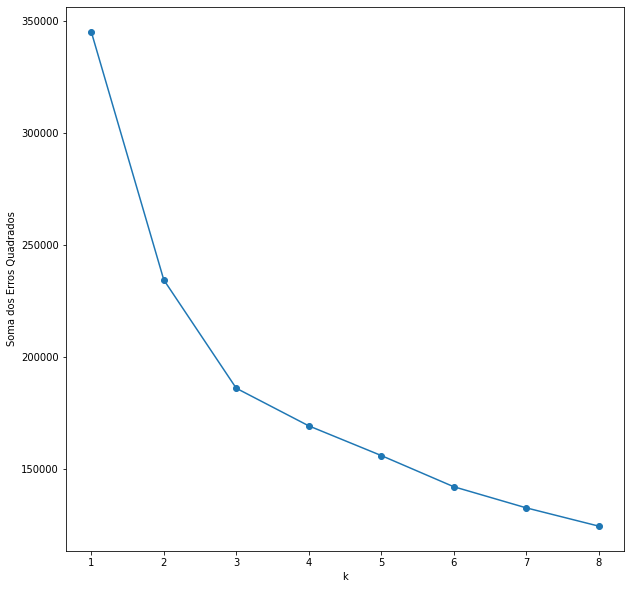

In [ ]:
k=list(range(1,9))
ssd=[]
for i in k:
    kmeans=KMeans(n_clusters=i).fit(scaled_all_features)
    ssd.append(kmeans.inertia_)

ax, fig = plt.subplots(figsize=(10,10))   
plt.plot(k,ssd,'o-')
plt.xlabel('k')
plt.ylabel('Soma dos Erros Quadrados')
plt.show()

In [ ]:
principal=PCA(n_components=2)
principal.fit(scaled_all_features)
scaled_all_features_pca=principal.transform(scaled_all_features)

scaled_all_features_pca.shape

(2762, 2)

In [ ]:
print(principal.explained_variance_ratio_)

[0.34065591 0.20239285]


In [ ]:
max = np.max(scaled_all_features_pca[:,0])
arr = scaled_all_features_pca[0:len(scaled_all_features_pca)-1,:]

for i in range(0,len(scaled_all_features_pca)):
  if(scaled_all_features_pca[i,0] == max):
    arr[0:i,:] = scaled_all_features_pca[0:i,:]
    arr[i:len(arr),:] = scaled_all_features_pca[i+1:len(scaled_all_features_pca),:]

print(arr.shape)

(2761, 2)


In [ ]:
max = np.max(arr[:,0])
arr1 = arr[0:len(arr)-1,:]

for i in range(0,len(arr)):
  if(arr[i,0] == max):
    arr1[0:i,:] = arr[0:i,:]
    arr1[i:len(arr1),:] = arr[i+1:len(arr),:]

print(arr1.shape)

(2756, 2)


In [ ]:
max = np.max(arr1[:,0])
arr = arr1[0:len(arr1)-1,:]

for i in range(0,len(arr1)):
  if(arr1[i,0] == max):
    arr[0:i,:] = arr[0:i,:]
    arr[i:len(arr),:] = arr1[i+1:len(arr1),:]

print(arr.shape)

(2755, 2)


In [ ]:
#clf = LocalOutlierFactor(n_neighbors=3, contamination=0.01)

#y_pred = clf.fit_predict(arr)
#n_errors = (y_pred != ground_truth).sum()
#X_scores = clf.negative_outlier_factor_

#plt.figure(figsize=(20, 10))
#plt.scatter(arr[:, 0], arr[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
#radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
#plt.scatter(arr[:, 0],arr[:, 1],s=1000 * radius,edgecolors="r",facecolors="none",label="Outlier scores",)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from numpy import quantile, where, random

In [ ]:
model = LocalOutlierFactor(n_neighbors=20) 

model.fit_predict(scaled_all_features)
lof = model.negative_outlier_factor_ 

thresh = quantile(lof, .05)
print(thresh)

index = where(lof<=thresh)
values = arr[index]

-2.046917814382694




*   Retirar os outliers



In [ ]:
index1 = where(lof>thresh)
print(len(index1))
arr5 = scaled_all_features_pca[index1]
print(len(arr5))

1
2623


In [ ]:
arr5.shape

(2734, 2)

In [ ]:
scaled_all_features_pca.shape

(2762, 2)

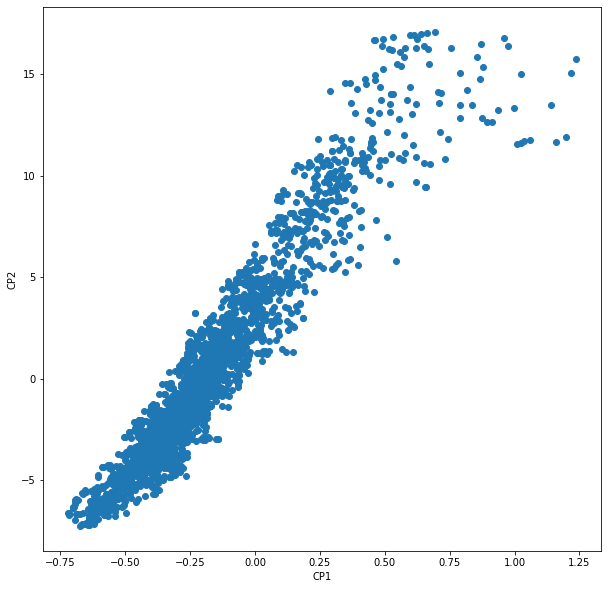

In [ ]:
plt.figure(figsize=(10, 10))
#plt.scatter(values[:,0], values[:,1], color='r')
plt.scatter(arr5[:,0], arr5[:,1])

plt.xlabel('CP1')
plt.ylabel('CP2')
plt.show()

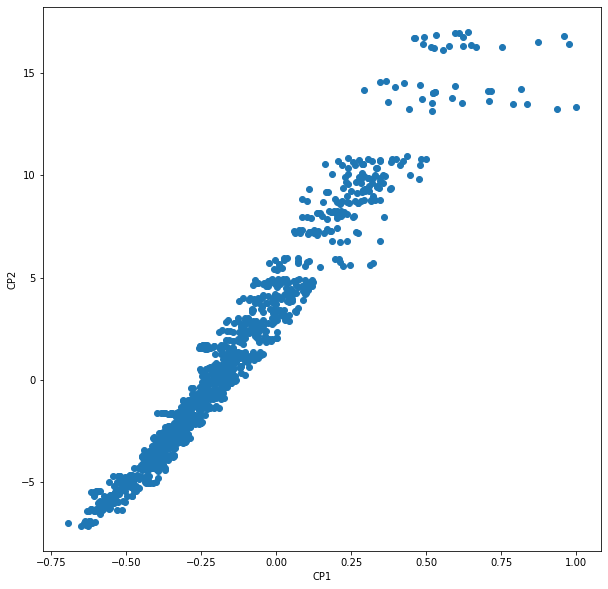

In [ ]:
plt.figure(figsize=(10, 10))
#plt.scatter(values[:,0], values[:,1], color='r')
plt.scatter(arr5[:,0], arr5[:,1])
plt.xlabel("Componente Principal 1 - Explica %.1f %% da variânica" % (principal.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Componente Principal 2 - Explica %.1f %% da variânica" % (principal.explained_variance_ratio_[1] * 100.0))
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.show()

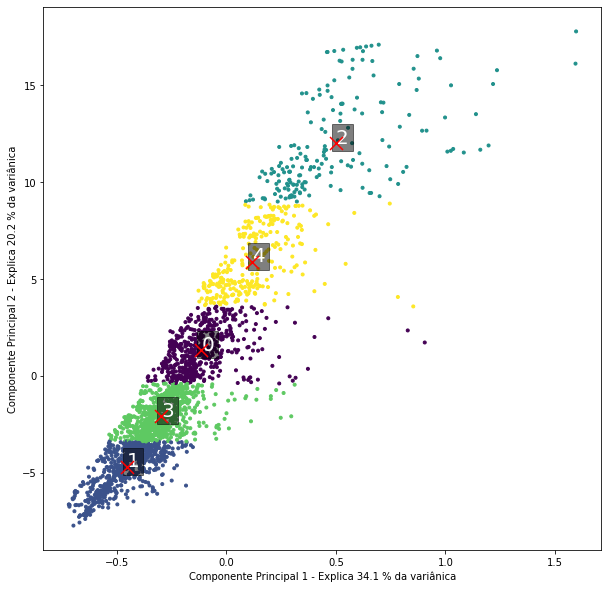

In [ ]:
# Predicts the clusters
kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(arr5)
kmeans_preds_scaled3=kmeans.predict(arr5)

centroids = kmeans.cluster_centers_
clusters = np.unique(kmeans_preds_scaled3)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(10,10))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# ploting the cluster numbers
for i in range(clusters.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], clusters[i], fontsize=20, color='white', bbox=dict(facecolor='black', alpha=0.5))
    
plt.scatter(arr5[:,0],arr5[:,1],c=kmeans_preds_scaled3,marker='.')
plt.xlabel("Componente Principal 1 - Explica %.1f %% da variânica" % (principal.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Componente Principal 2 - Explica %.1f %% da variânica" % (principal.explained_variance_ratio_[1] * 100.0))
#plt.axhline(y = 4/len(arr), color = 'r', linestyle = '-')

plt.show()

In [ ]:
SIL3 = metrics.silhouette_score(arr5, kmeans_preds_scaled3, metric='euclidean')
print(SIL3)
CH3 = metrics.calinski_harabasz_score(arr5, kmeans_preds_scaled3)
print(CH3)
DB3 = metrics.davies_bouldin_score(arr5, kmeans_preds_scaled3)
print(DB3)

0.5125410909070773
9163.364867257586
0.5864189559947606


## TSNE para diferentes valores de perplexity



*   Perplexity = 50



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


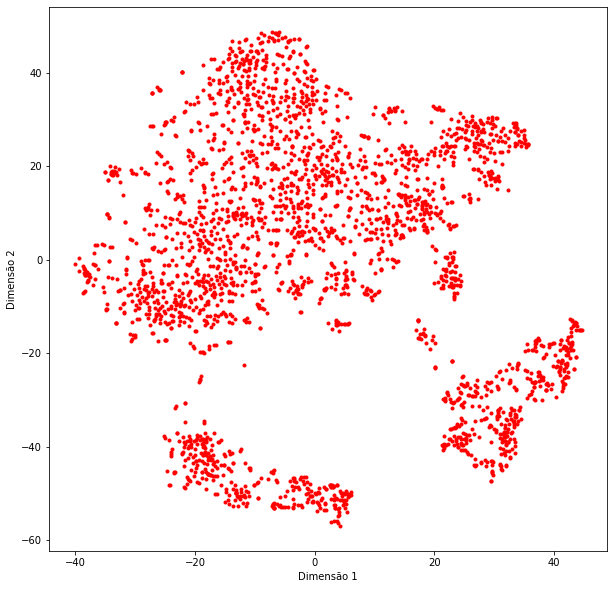

In [ ]:
tsne = TSNE(n_components=2, verbose=0, perplexity=50)
all_features_tsne_30_scaled = tsne.fit_transform(scaled_all_features)

# plotting the clusters TSNE
plt.figure(figsize=(10,10))
plt.plot(all_features_tsne_30_scaled[:,0], all_features_tsne_30_scaled[:,1], 'r.')
#plt.title('PCA All Transformation')
#plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (tsne.explained_variance_ratio_[0] * 100.0))
#plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (tsne.explained_variance_ratio_[1] * 100.0))
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

*   Perplexity = 2


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


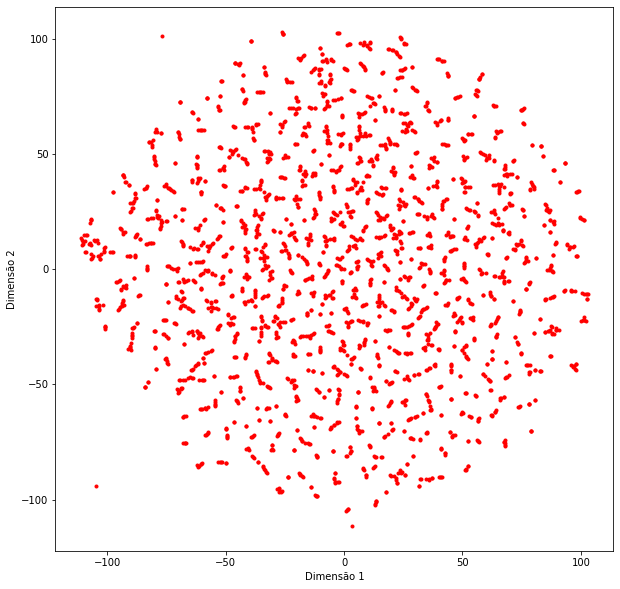

In [ ]:
tsne = TSNE(n_components=2, verbose=0, perplexity=2)
all_features_tsne_2_scaled = tsne.fit_transform(scaled_all_features)

# plotting the clusters TSNE
plt.figure(figsize=(10,10))
plt.plot(all_features_tsne_2_scaled[:,0], all_features_tsne_2_scaled[:,1], 'r.')
#plt.title('TSNE - Perplexity = 2')
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

*   Perplexity = 100


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 2762 samples in 0.000s...
[t-SNE] Computed neighbors for 2762 samples in 0.258s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2762
[t-SNE] Computed conditional probabilities for sample 2000 / 2762
[t-SNE] Computed conditional probabilities for sample 2762 / 2762
[t-SNE] Mean sigma: 1.875177
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.028950
[t-SNE] KL divergence after 1000 iterations: 0.858405


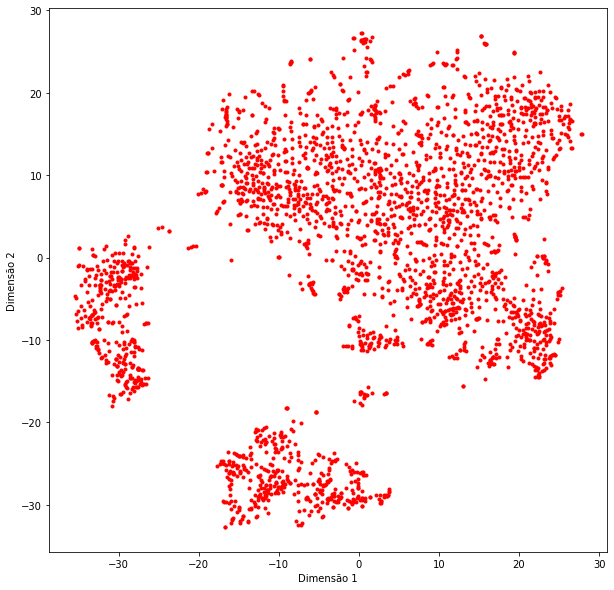

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=100)
all_features_tsne_100_scaled = tsne.fit_transform(scaled_all_features)

# plotting the clusters TSNE
plt.figure(figsize=(10,10))
plt.plot(all_features_tsne_100_scaled[:,0], all_features_tsne_100_scaled[:,1], 'r.')
#plt.title('TSNE - Perplexity = 100')
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()



*   Perplexity = 5



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


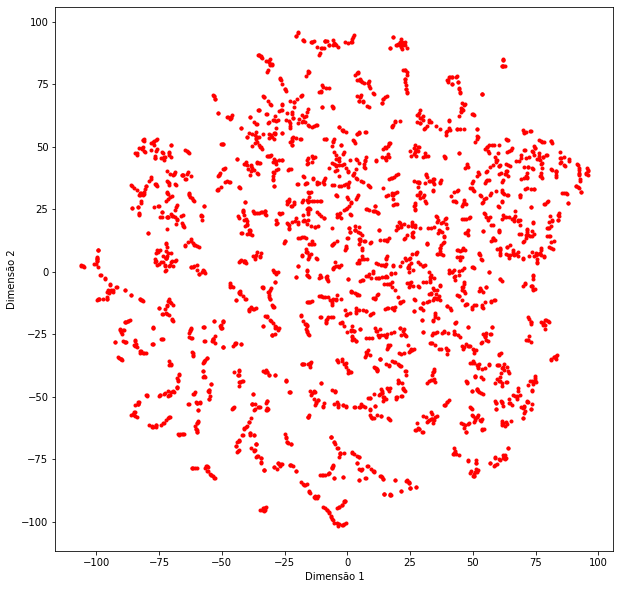

In [ ]:
tsne = TSNE(n_components=2, verbose=0, perplexity=5)
all_features_shuffled_tsne_30_scaled = tsne.fit_transform(scaled_all_features)

# plotting the clusters TSNE
plt.figure(figsize=(10,10))
plt.plot(all_features_shuffled_tsne_30_scaled[:,0], all_features_shuffled_tsne_30_scaled[:,1], 'r.')
#plt.title('TSNE - Perplexity = 30')
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

## Silhouette - Heat Map

In [ ]:
silhouette_values = [0] * 700
clusters_nr = [0] * 700
perplex = [0] * 700

max_value = 0
indice = 0
t = 0

for i in range(1,101,1):
  tsne = TSNE(n_components=2, verbose=0, perplexity=i)
  data_tsne = tsne.fit_transform(scaled_all_features)

  for j in range(2,9,1):
    # Predicts the clusters
    kmeans=KMeans(init='k-means++',n_clusters=j)
    
    kmeans.fit(data_tsne)
    kmeans_preds_scaled=kmeans.predict(data_tsne)

    centroids = kmeans.cluster_centers_
    clusters = np.unique(kmeans_preds_scaled)

    kmeans_silhouette = metrics.silhouette_score(data_tsne, kmeans_preds_scaled, metric='euclidean')
    kmeans_silhouette

    silhouette_values[t] = kmeans_silhouette
    clusters_nr[t] = j
    perplex [t] = i

    if (silhouette_values[t] > max_value):
          max_value = silhouette_values[t]
          indice = t

    t=t+1

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

In [ ]:
print(max_value)
print(indice+1) # Começa no indice 0 que correponde a uma perplexity = 1

0.51293135
522




*   Valor máximo de 0.9327062 para 2 clusters e perplexity = 7



In [ ]:
#silhouette_values

In [ ]:
Z1 = np.reshape(silhouette_values, (100, 7))
print(Z1)

[[0.3317312  0.3582196  0.34999436 0.3254206  0.3508244  0.34710857
  0.33702096]
 [0.3342597  0.3700224  0.35207945 0.33272165 0.35568634 0.35488722
  0.3413307 ]
 [0.34839293 0.3734374  0.37234375 0.35849285 0.3689473  0.3634904
  0.35454148]
 [0.34209988 0.37401384 0.35226196 0.3564203  0.37759504 0.36932522
  0.35528132]
 [0.33814216 0.3819601  0.35882333 0.34561238 0.3895271  0.38904786
  0.37833142]
 [0.36159965 0.37860966 0.3571376  0.3631849  0.3763233  0.38423628
  0.38362938]
 [0.34493005 0.38568488 0.3969002  0.3994221  0.4093305  0.40086237
  0.39086887]
 [0.3440152  0.38704458 0.38007408 0.4036243  0.4265758  0.41193128
  0.4044455 ]
 [0.36161035 0.38805118 0.38530275 0.40029347 0.4094187  0.38733402
  0.40954936]
 [0.36845836 0.3944727  0.42077142 0.4303579  0.40589228 0.3987574
  0.39491558]
 [0.35188687 0.38729462 0.43763644 0.41211814 0.39745072 0.4270096
  0.41023457]
 [0.40595847 0.3766949  0.3766297  0.3921914  0.42844138 0.4286583
  0.42758217]
 [0.37505868 0.40998

In [ ]:
df31 = pd.DataFrame(Z1)
df31

,0,1,2,3,4,5,6
0,0.331731,0.358220,0.349994,0.325421,0.350824,0.347109,0.337021
1,0.334260,0.370022,0.352079,0.332722,0.355686,0.354887,0.341331
2,0.348393,0.373437,0.372344,0.358493,0.368947,0.363490,0.354541
3,0.342100,0.374014,0.352262,0.356420,0.377595,0.369325,0.355281
4,0.338142,0.381960,0.358823,0.345612,0.389527,0.389048,0.378331
...,...,...,...,...,...,...,...
95,0.473707,0.456082,0.474200,0.508608,0.495154,0.481322,0.478861
96,0.492177,0.413551,0.473287,0.508042,0.493836,0.481602,0.479957
97,0.497307,0.420718,0.470113,0.506002,0.488467,0.479381,0.474299
98,0.494677,0.419876,0.471868,0.506139,0.487807,0.477277,0.476856


In [ ]:
df41 = df31.drop(columns=[0,1,2,3,4,5,6])
df41["2"] = df31[0]
df41["3"] = df31[1]
df41["4"] = df31[2]
df41["5"] = df31[3]
df41["6"] = df31[4]
df41["7"] = df31[5]
df41["8"] = df31[6]
df41

,2,3,4,5,6,7,8
0,0.331731,0.358220,0.349994,0.325421,0.350824,0.347109,0.337021
1,0.334260,0.370022,0.352079,0.332722,0.355686,0.354887,0.341331
2,0.348393,0.373437,0.372344,0.358493,0.368947,0.363490,0.354541
3,0.342100,0.374014,0.352262,0.356420,0.377595,0.369325,0.355281
4,0.338142,0.381960,0.358823,0.345612,0.389527,0.389048,0.378331
...,...,...,...,...,...,...,...
95,0.473707,0.456082,0.474200,0.508608,0.495154,0.481322,0.478861
96,0.492177,0.413551,0.473287,0.508042,0.493836,0.481602,0.479957
97,0.497307,0.420718,0.470113,0.506002,0.488467,0.479381,0.474299
98,0.494677,0.419876,0.471868,0.506139,0.487807,0.477277,0.476856


In [ ]:
df4_reverse1 = df41.iloc[::-1]
df4_reverse1

,2,3,4,5,6,7,8
99,0.504325,0.422972,0.471012,0.504754,0.487678,0.478370,0.473773
98,0.494677,0.419876,0.471868,0.506139,0.487807,0.477277,0.476856
97,0.497307,0.420718,0.470113,0.506002,0.488467,0.479381,0.474299
96,0.492177,0.413551,0.473287,0.508042,0.493836,0.481602,0.479957
95,0.473707,0.456082,0.474200,0.508608,0.495154,0.481322,0.478861
...,...,...,...,...,...,...,...
4,0.338142,0.381960,0.358823,0.345612,0.389527,0.389048,0.378331
3,0.342100,0.374014,0.352262,0.356420,0.377595,0.369325,0.355281
2,0.348393,0.373437,0.372344,0.358493,0.368947,0.363490,0.354541
1,0.334260,0.370022,0.352079,0.332722,0.355686,0.354887,0.341331


In [ ]:
print(max(df4_reverse1["2"]))
print(max(df4_reverse1["3"]))
print(max(df4_reverse1["4"]))
print(max(df4_reverse1["5"]))
print(max(df4_reverse1["6"]))
print(max(df4_reverse1["7"]))
print(max(df4_reverse1["8"]))

0.5043252110481262
0.46491512656211853
0.47693875432014465
0.5129313468933105
0.4978668987751007
0.48422563076019287
0.4836912453174591




*   Valor máximo para 5 Clusters e perplexity = 75



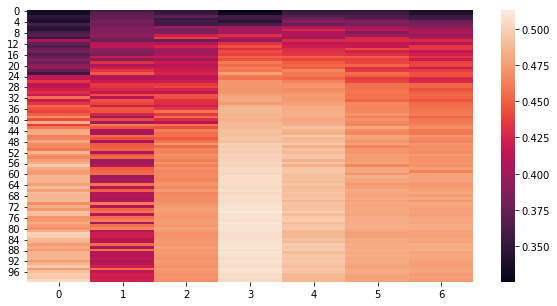

In [ ]:
ax = sns.heatmap(df31)

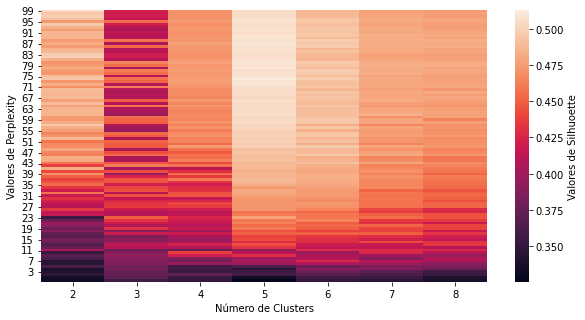

In [ ]:
ax = sns.heatmap(df4_reverse1)
ax.set(xlabel='Número de Clusters', ylabel='Valores de Perplexity')
ax.collections[0].colorbar.set_label("Valores de Silhuoette")



*   Aplicação do t-SNE para os valores ótimos



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


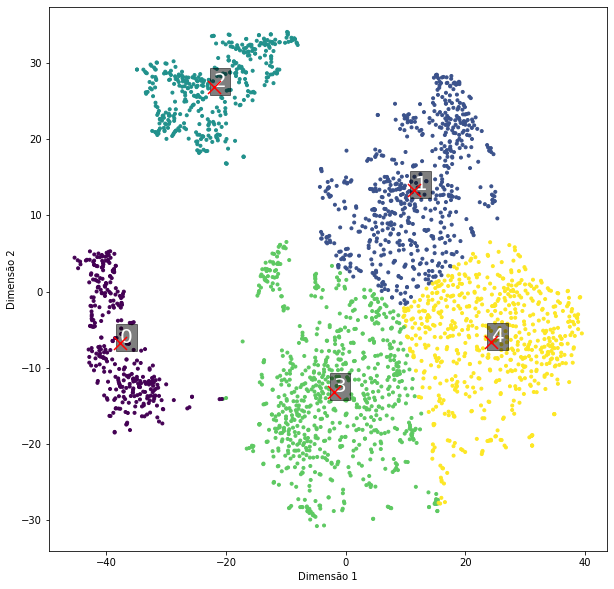

In [ ]:
tsne = TSNE(n_components=2, verbose=0,perplexity=75)
all_features_tsne_30_scaled = tsne.fit_transform(scaled_all_features)

kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(all_features_tsne_30_scaled)
kmeans_preds_scaled=kmeans.predict(all_features_tsne_30_scaled)

centroids = kmeans.cluster_centers_
clusters = np.unique(kmeans_preds_scaled)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(10,10))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# ploting the cluster numbers
for i in range(clusters.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], clusters[i], fontsize=20, color='white', bbox=dict(facecolor='black', alpha=0.5))
    
plt.scatter(all_features_tsne_30_scaled[:,0],all_features_tsne_30_scaled[:,1],c=kmeans_preds_scaled,marker='.')
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

## Calinski Harabasz Score - Heat Map

In [ ]:
calinski_harabasz_scr = 0
clusters_nr = [0] * 700
perplex = [0] * 700
#kmeans_ch = [0] * 700
kmeans_ch = []

max_value1 = 0
indice1 = 0
t1 = 0

for i in range(1,101,1):
  tsne = TSNE(n_components=2, verbose=0, perplexity=i)
  data_tsne = tsne.fit_transform(scaled_all_features)

  for j in range(2,9,1):
    # Predicts the clusters
    kmeans=KMeans(init='k-means++',n_clusters=j)
    
    kmeans.fit(data_tsne)
    kmeans_preds_scaled=kmeans.predict(data_tsne)

    centroids = kmeans.cluster_centers_
    clusters = np.unique(kmeans_preds_scaled)

    calinski_harabasz_scr = metrics.calinski_harabasz_score(data_tsne, kmeans_preds_scaled)
    #print(calinski_harabasz_scr)
    kmeans_ch.append(calinski_harabasz_scr)
    clusters_nr[t1] = j
    perplex [t1] = i

    if (kmeans_ch[t1] > max_value1):
          max_value1 = kmeans_ch[t1]
          indice1 = t1

    t1=t1+1

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

In [ ]:
print(max_value1)
print(indice1+1) # Começa no indice 0 que correponde a uma perplexity = 1

4655.777793455385
686


*   Valor máximo de 10265.288099795502 para um 4 clusters e perplexity = 8

In [ ]:
#kmeans_ch

In [ ]:
Z2 = np.reshape(kmeans_ch, (100, 7))
print(Z2)

[[1515.85108522 1979.39532429 2140.24019124 2079.27504096 2121.419681
  2173.44167216 2145.32154824]
 [1549.27743907 2111.98458329 2272.42678158 2227.34127482 2263.36246608
  2331.79954645 2335.61992696]
 [1518.31230613 2063.47391042 2197.42418189 2210.81161189 2267.32233892
  2407.95364321 2363.71173981]
 [1638.7896475  2111.32425514 2305.35869527 2290.03719879 2419.13965938
  2456.97585428 2510.42911805]
 [1860.88709038 2152.41191492 2415.63313209 2456.47667548 2430.55111192
  2486.69663507 2513.35531068]
 [1772.16334709 2090.01604243 2428.5628797  2516.13408824 2566.32359589
  2567.60451906 2567.13310534]
 [1975.23304878 2185.33414308 2565.40529676 2479.31349145 2511.1920446
  2531.28198867 2524.11787817]
 [1810.53368883 2094.4653843  2334.34268668 2373.62862739 2436.66774604
  2455.74339834 2488.71356806]
 [1878.71604262 2099.83341361 2319.55080175 2558.11255205 2619.0041358
  2715.58684196 2759.88484381]
 [1991.09416817 2154.07892682 2384.18377523 2649.12930356 2699.14369813
  275

In [ ]:
df32 = pd.DataFrame(Z2)
df32

,0,1,2,3,4,5,6
0,1515.851085,1979.395324,2140.240191,2079.275041,2121.419681,2173.441672,2145.321548
1,1549.277439,2111.984583,2272.426782,2227.341275,2263.362466,2331.799546,2335.619927
2,1518.312306,2063.473910,2197.424182,2210.811612,2267.322339,2407.953643,2363.711740
3,1638.789648,2111.324255,2305.358695,2290.037199,2419.139659,2456.975854,2510.429118
4,1860.887090,2152.411915,2415.633132,2456.476675,2430.551112,2486.696635,2513.355311
...,...,...,...,...,...,...,...
95,2600.662074,2560.643782,3253.039226,4268.151382,4483.738391,4554.796559,4613.077304
96,2507.582655,2597.852586,3278.664370,4356.955711,4508.375209,4574.489395,4572.656919
97,2994.730430,2957.104526,3249.081628,4308.635470,4530.080462,4609.679816,4655.777793
98,2955.937203,2941.511895,3236.585530,4259.775348,4475.237300,4548.478316,4604.570212


In [ ]:
df42 = df32.drop(columns=[0,1,2,3,4,5,6])
df42["2"] = df32[0]
df42["3"] = df32[1]
df42["4"] = df32[2]
df42["5"] = df32[3]
df42["6"] = df32[4]
df42["7"] = df32[5]
df42["8"] = df32[6]
df42

,2,3,4,5,6,7,8
0,1515.851085,1979.395324,2140.240191,2079.275041,2121.419681,2173.441672,2145.321548
1,1549.277439,2111.984583,2272.426782,2227.341275,2263.362466,2331.799546,2335.619927
2,1518.312306,2063.473910,2197.424182,2210.811612,2267.322339,2407.953643,2363.711740
3,1638.789648,2111.324255,2305.358695,2290.037199,2419.139659,2456.975854,2510.429118
4,1860.887090,2152.411915,2415.633132,2456.476675,2430.551112,2486.696635,2513.355311
...,...,...,...,...,...,...,...
95,2600.662074,2560.643782,3253.039226,4268.151382,4483.738391,4554.796559,4613.077304
96,2507.582655,2597.852586,3278.664370,4356.955711,4508.375209,4574.489395,4572.656919
97,2994.730430,2957.104526,3249.081628,4308.635470,4530.080462,4609.679816,4655.777793
98,2955.937203,2941.511895,3236.585530,4259.775348,4475.237300,4548.478316,4604.570212


In [ ]:
df4_reverse2 = df42.iloc[::-1]
df4_reverse2

,2,3,4,5,6,7,8
99,2635.693425,2596.855738,3229.747172,4233.913843,4463.971718,4542.995406,4604.077367
98,2955.937203,2941.511895,3236.585530,4259.775348,4475.237300,4548.478316,4604.570212
97,2994.730430,2957.104526,3249.081628,4308.635470,4530.080462,4609.679816,4655.777793
96,2507.582655,2597.852586,3278.664370,4356.955711,4508.375209,4574.489395,4572.656919
95,2600.662074,2560.643782,3253.039226,4268.151382,4483.738391,4554.796559,4613.077304
...,...,...,...,...,...,...,...
4,1860.887090,2152.411915,2415.633132,2456.476675,2430.551112,2486.696635,2513.355311
3,1638.789648,2111.324255,2305.358695,2290.037199,2419.139659,2456.975854,2510.429118
2,1518.312306,2063.473910,2197.424182,2210.811612,2267.322339,2407.953643,2363.711740
1,1549.277439,2111.984583,2272.426782,2227.341275,2263.362466,2331.799546,2335.619927


In [ ]:
print(max(df4_reverse2["2"]))
print(max(df4_reverse2["3"]))
print(max(df4_reverse2["4"]))
print(max(df4_reverse2["5"]))
print(max(df4_reverse2["6"]))
print(max(df4_reverse2["7"]))
print(max(df4_reverse2["8"]))

3015.1455820048564
2960.935545054973
3296.1177852100914
4366.138200893511
4530.589525200842
4609.67981629393
4655.777793455385




*   Valor máximo para 4 Clusters e perplexity = 48



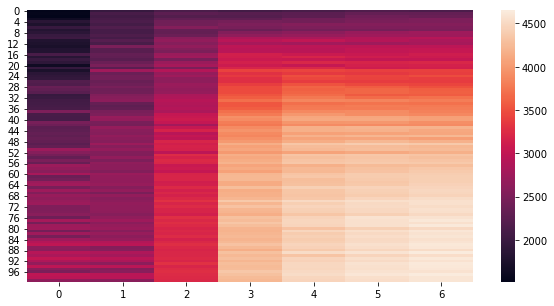

In [ ]:
ax = sns.heatmap(df32)

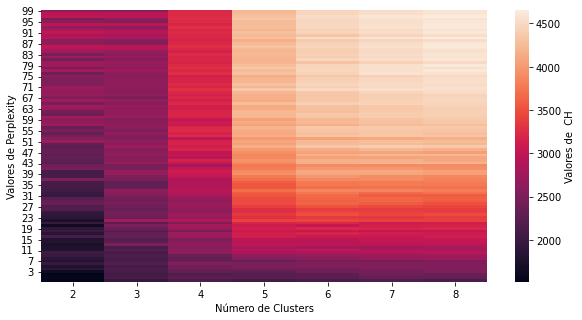

In [ ]:
ax = sns.heatmap(df4_reverse2)
ax.set(xlabel='Número de Clusters', ylabel='Valores de Perplexity')
ax.collections[0].colorbar.set_label("Valores de  CH")



*   Aplicação t-SNE para valores ótimos



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


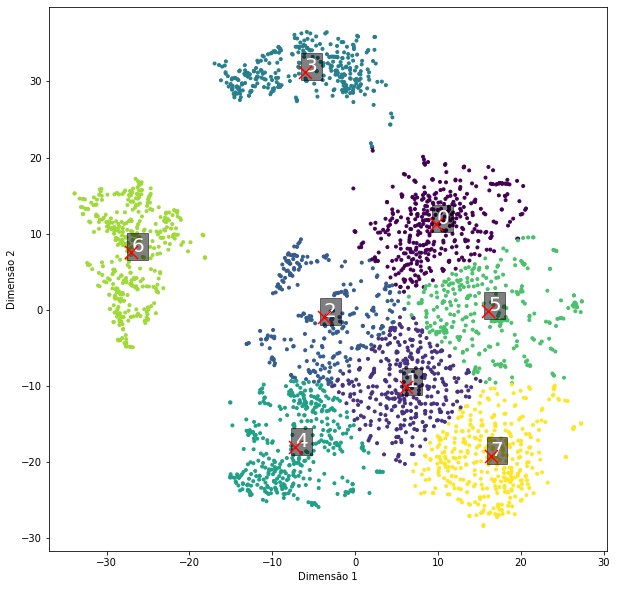

In [ ]:
tsne = TSNE(n_components=2, verbose=0,perplexity=98)
all_features_tsne_30_scaled = tsne.fit_transform(scaled_all_features)

kmeans=KMeans(init='k-means++',n_clusters=8)
kmeans.fit(all_features_tsne_30_scaled)
kmeans_preds_scaled=kmeans.predict(all_features_tsne_30_scaled)

centroids = kmeans.cluster_centers_
clusters = np.unique(kmeans_preds_scaled)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(10,10))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# ploting the cluster numbers
for i in range(clusters.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], clusters[i], fontsize=20, color='white', bbox=dict(facecolor='black', alpha=0.5))
    
plt.scatter(all_features_tsne_30_scaled[:,0],all_features_tsne_30_scaled[:,1],c=kmeans_preds_scaled,marker='.')
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

## Davies Bouldin Score - Heat Map

In [ ]:
davies_bouldin_scr = 0
clusters_nr = [0] * 700
perplex = [0] * 700
#kmeans_ch = [0] * 700
kmeans_db = []

min_value = 0
indice = 0
t2 = 0

for i in range(1,101,1):
  tsne = TSNE(n_components=2, verbose=0, perplexity=i)
  data_tsne = tsne.fit_transform(scaled_all_features)

  for j in range(2,9,1):
    # Predicts the clusters
    kmeans=KMeans(init='k-means++',n_clusters=j)
    
    kmeans.fit(data_tsne)
    kmeans_preds_scaled=kmeans.predict(data_tsne)

    centroids = kmeans.cluster_centers_
    clusters = np.unique(kmeans_preds_scaled)

    davies_bouldin_scr = metrics.davies_bouldin_score(data_tsne, kmeans_preds_scaled)
    
    kmeans_db.append(davies_bouldin_scr)
    clusters_nr[t2] = j
    perplex [t2] = i

    if (kmeans_db[t2] < min_value):
          min_value = kmeans_db[t2]
          indice = t2

    t2=t2+1

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

In [ ]:
print(min_value)
print(indice+1) # Começa no indice 0 que correponde a uma perplexity = 1

0
1


In [ ]:
#kmeans_db

In [ ]:
Z3 = np.reshape(kmeans_db, (100, 7))
print(Z3)

[[1.23255121 0.88315808 0.85844641 0.92104864 0.80322897 0.80057918
  0.83503294]
 [1.20265107 0.85796699 0.84707969 0.89728016 0.81038578 0.78137013
  0.8203139 ]
 [1.18994436 0.86665306 0.84139429 0.89570725 0.79562588 0.79807214
  0.82084512]
 [1.1601321  0.86974401 0.88291372 0.91651891 0.77782663 0.79423137
  0.78997641]
 [1.18467398 0.86007369 0.82806524 0.89032399 0.81028689 0.79441954
  0.81063277]
 [1.13452707 0.86268893 0.86178458 0.88195881 0.81546348 0.78020892
  0.76718289]
 [1.10771421 0.90396777 0.78431367 0.84058958 0.81383069 0.76355161
  0.79451498]
 [1.18528098 0.84612396 0.84289244 0.81605171 0.76344275 0.75577961
  0.7750451 ]
 [1.16853397 0.85150163 0.79923129 0.83116641 0.78932488 0.7690379
  0.78235874]
 [1.09107866 0.82444066 0.79485848 0.78438929 0.80582834 0.81081069
  0.84425572]
 [1.09404483 0.89511124 0.84178092 0.79558721 0.79240451 0.83447063
  0.82661698]
 [1.19538966 0.84077106 0.84302012 0.7685583  0.78037082 0.78663409
  0.8407273 ]
 [1.19893833 0.83

In [ ]:
df33 = pd.DataFrame(Z3)
df33

,0,1,2,3,4,5,6
0,1.232551,0.883158,0.858446,0.921049,0.803229,0.800579,0.835033
1,1.202651,0.857967,0.847080,0.897280,0.810386,0.781370,0.820314
2,1.189944,0.866653,0.841394,0.895707,0.795626,0.798072,0.820845
3,1.160132,0.869744,0.882914,0.916519,0.777827,0.794231,0.789976
4,1.184674,0.860074,0.828065,0.890324,0.810287,0.794420,0.810633
...,...,...,...,...,...,...,...
95,0.828971,0.875982,0.717997,0.643122,0.721714,0.718344,0.721858
96,0.889149,0.877991,0.715362,0.647228,0.718310,0.726258,0.727627
97,0.801691,0.865223,0.730250,0.645915,0.707341,0.739529,0.731058
98,0.799609,0.876721,0.714915,0.641018,0.711288,0.719079,0.730237


In [ ]:
df43 = df33.drop(columns=[0,1,2,3,4,5,6])
df43["2"] = df33[0]
df43["3"] = df33[1]
df43["4"] = df33[2]
df43["5"] = df33[3]
df43["6"] = df33[4]
df43["7"] = df33[5]
df43["8"] = df33[6]
df43

,2,3,4,5,6,7,8
0,1.232551,0.883158,0.858446,0.921049,0.803229,0.800579,0.835033
1,1.202651,0.857967,0.847080,0.897280,0.810386,0.781370,0.820314
2,1.189944,0.866653,0.841394,0.895707,0.795626,0.798072,0.820845
3,1.160132,0.869744,0.882914,0.916519,0.777827,0.794231,0.789976
4,1.184674,0.860074,0.828065,0.890324,0.810287,0.794420,0.810633
...,...,...,...,...,...,...,...
95,0.828971,0.875982,0.717997,0.643122,0.721714,0.718344,0.721858
96,0.889149,0.877991,0.715362,0.647228,0.718310,0.726258,0.727627
97,0.801691,0.865223,0.730250,0.645915,0.707341,0.739529,0.731058
98,0.799609,0.876721,0.714915,0.641018,0.711288,0.719079,0.730237


In [ ]:
df4_reverse3 = df43.iloc[::-1]
df4_reverse3

,2,3,4,5,6,7,8
99,0.910979,0.881987,0.707410,0.650127,0.712264,0.741238,0.732633
98,0.799609,0.876721,0.714915,0.641018,0.711288,0.719079,0.730237
97,0.801691,0.865223,0.730250,0.645915,0.707341,0.739529,0.731058
96,0.889149,0.877991,0.715362,0.647228,0.718310,0.726258,0.727627
95,0.828971,0.875982,0.717997,0.643122,0.721714,0.718344,0.721858
...,...,...,...,...,...,...,...
4,1.184674,0.860074,0.828065,0.890324,0.810287,0.794420,0.810633
3,1.160132,0.869744,0.882914,0.916519,0.777827,0.794231,0.789976
2,1.189944,0.866653,0.841394,0.895707,0.795626,0.798072,0.820845
1,1.202651,0.857967,0.847080,0.897280,0.810386,0.781370,0.820314


In [ ]:
print(min(df4_reverse3["2"]))
print(min(df4_reverse3["3"]))
print(min(df4_reverse3["4"]))
print(min(df4_reverse3["5"]))
print(min(df4_reverse3["6"]))
print(min(df4_reverse3["7"]))
print(min(df4_reverse3["8"]))

0.7996085442438012
0.7622423449460501
0.7074100534686978
0.6387079698303525
0.6878688422598794
0.7146671409693955
0.7047929101705289


0.10849007268454522

*   Valor máximo para 2 Clusters e perplexity = 45



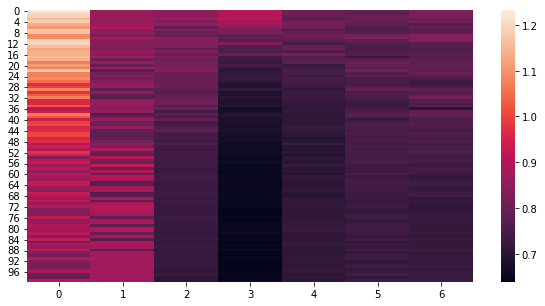

In [ ]:
ax = sns.heatmap(df33)

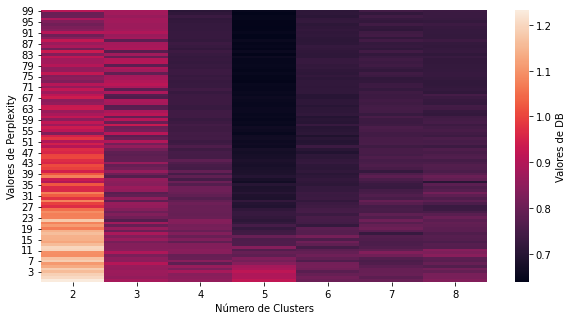

In [ ]:
ax = sns.heatmap(df4_reverse3)
ax.set(xlabel='Número de Clusters', ylabel='Valores de Perplexity')
ax.collections[0].colorbar.set_label("Valores de DB")

 

*   Aplicação do t-SNE para os valores ótimos



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


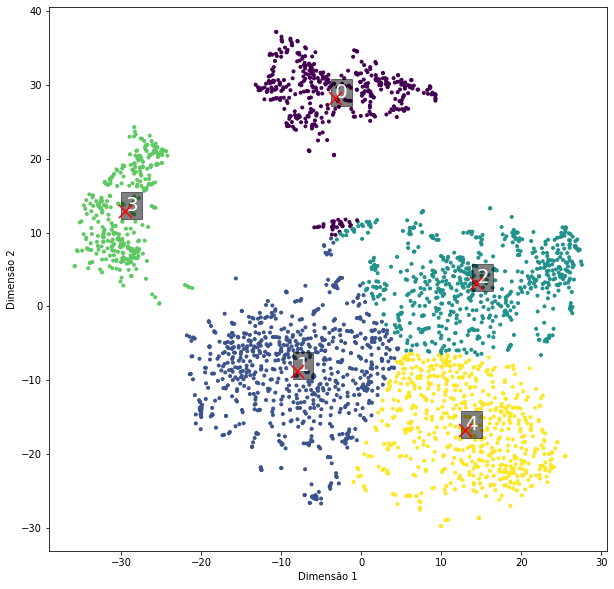

In [ ]:
tsne = TSNE(n_components=2, verbose=0,perplexity=94)
all_features_tsne_30_scaled = tsne.fit_transform(scaled_all_features)

kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(all_features_tsne_30_scaled)
kmeans_preds_scaled=kmeans.predict(all_features_tsne_30_scaled)

centroids = kmeans.cluster_centers_
clusters = np.unique(kmeans_preds_scaled)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(10,10))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# ploting the cluster numbers
for i in range(clusters.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], clusters[i], fontsize=20, color='white', bbox=dict(facecolor='black', alpha=0.5))
    
plt.scatter(all_features_tsne_30_scaled[:,0],all_features_tsne_30_scaled[:,1],c=kmeans_preds_scaled,marker='.')
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

In [ ]:
kmeans_silhouette = metrics.silhouette_score(all_features_tsne_30_scaled, kmeans_preds_scaled, metric='euclidean')
kmeans_silhouette

0.5050669

## Escolha do parâmetro ótimo



*   5 Clusters Perplexity = x



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


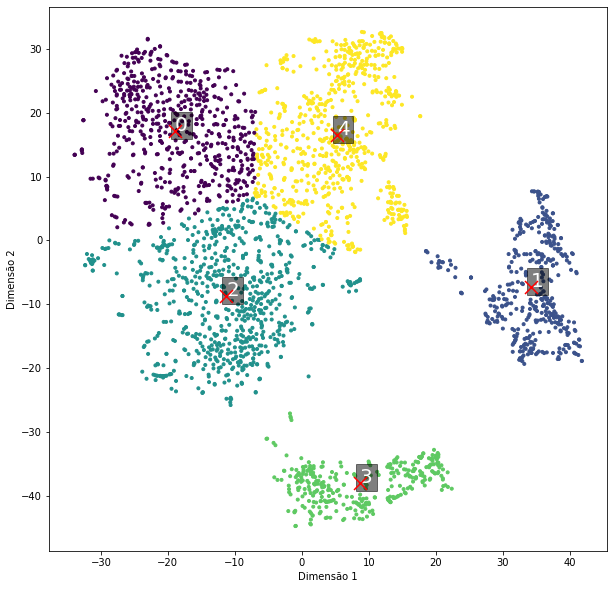

In [ ]:
tsne = TSNE(n_components=2, verbose=0,perplexity=71)
all_features_tsne_30_scaled = tsne.fit_transform(scaled_all_features)

kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(all_features_tsne_30_scaled)
kmeans_preds_scaled1=kmeans.predict(all_features_tsne_30_scaled)

centroids = kmeans.cluster_centers_
clusters = np.unique(kmeans_preds_scaled1)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(10,10))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# ploting the cluster numbers
for i in range(clusters.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], clusters[i], fontsize=20, color='white', bbox=dict(facecolor='black', alpha=0.5))
    
plt.scatter(all_features_tsne_30_scaled[:,0],all_features_tsne_30_scaled[:,1],c=kmeans_preds_scaled1,marker='.')
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()



*   5 Clusters Perplexity = x



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


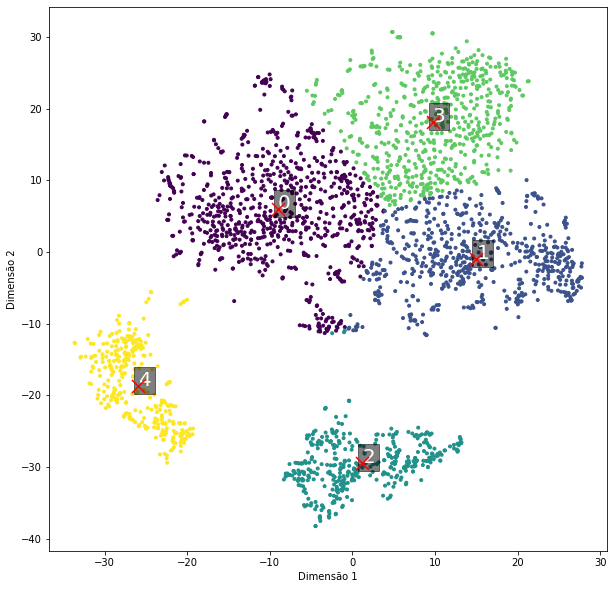

In [ ]:
tsne = TSNE(n_components=2, verbose=0,perplexity=98)
all_features_tsne_30_scaled = tsne.fit_transform(scaled_all_features)

kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(all_features_tsne_30_scaled)
kmeans_preds_scaled2=kmeans.predict(all_features_tsne_30_scaled)

centroids = kmeans.cluster_centers_
clusters = np.unique(kmeans_preds_scaled2)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(10,10))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# ploting the cluster numbers
for i in range(clusters.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], clusters[i], fontsize=20, color='white', bbox=dict(facecolor='black', alpha=0.5))
    
plt.scatter(all_features_tsne_30_scaled[:,0],all_features_tsne_30_scaled[:,1],c=kmeans_preds_scaled2,marker='.')
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

*   Matriz Confusão

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
conf_matrix = confusion_matrix(kmeans_preds_scaled2,kmeans_preds_scaled1)
#print(conf_matrix)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['0','1','2','3','4'], 
                     columns = ['0','1','2','3','4'])
conf_matrix_df

,0,1,2,3,4
0,0,768,0,22,1
1,0,25,0,0,594
2,399,3,0,0,1
3,0,3,0,594,14
4,0,0,338,0,0


## t-SNE + k-means

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


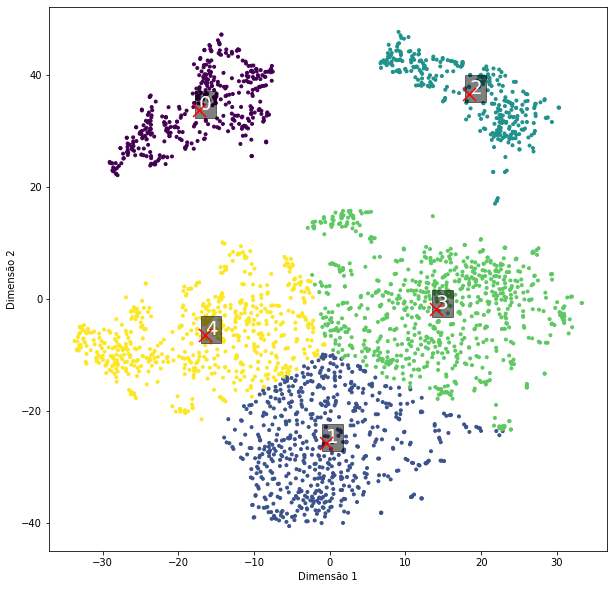

In [ ]:
tsne = TSNE(n_components=2, verbose=0,perplexity=71)
all_features_tsne_30 = tsne.fit_transform(scaled_all_features)

kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(all_features_tsne_30)
tsne_shuffle1_data_71=kmeans.predict(all_features_tsne_30)

centroids = kmeans.cluster_centers_
clusters = np.unique(tsne_shuffle1_data_71)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(10,10))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# ploting the cluster numbers
for i in range(clusters.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], clusters[i], fontsize=20, color='white', bbox=dict(facecolor='black', alpha=0.5))
    
plt.scatter(all_features_tsne_30[:,0],all_features_tsne_30[:,1],c=tsne_shuffle1_data_71,marker='.')
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


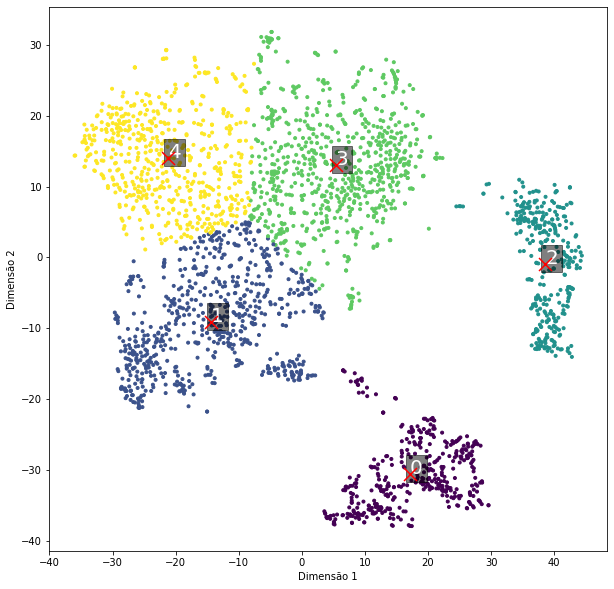

In [ ]:
tsne = TSNE(n_components=2, verbose=0,perplexity=75)
all_features_tsne_30 = tsne.fit_transform(scaled_all_features)

kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(all_features_tsne_30)
tsne_shuffle1_data_98=kmeans.predict(all_features_tsne_30)

centroids = kmeans.cluster_centers_
clusters = np.unique(tsne_shuffle1_data_98)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(10,10))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# ploting the cluster numbers
for i in range(clusters.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], clusters[i], fontsize=20, color='white', bbox=dict(facecolor='black', alpha=0.5))
    
plt.scatter(all_features_tsne_30[:,0],all_features_tsne_30[:,1],c=tsne_shuffle1_data_98,marker='.')
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

In [ ]:
RI1 = rand_score(tsne_shuffle1_data_71, tsne_shuffle1_data_98)
print(RI1)

ARI1 = adjusted_rand_score(tsne_shuffle1_data_71, tsne_shuffle1_data_98)
print(ARI1)

0.9528143760944635
0.8608603887381052


In [ ]:
conf = confusion_matrix(tsne_shuffle1_data_71, tsne_shuffle1_data_98)
conf

array([[400,   0,   0,   0,   0],
       [  0,  16,   0,  31, 563],
       [  0,   0, 338,   0,   0],
       [  0,  68,   0, 718,   0],
       [ 18, 600,   0,   3,   7]])

## Clusterização ótima + shuffle

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


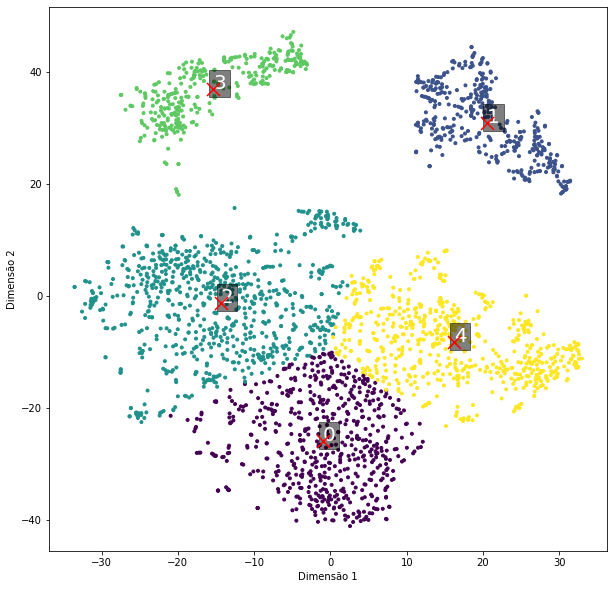

In [ ]:
tsne = TSNE(n_components=2, verbose=0,perplexity=71)
all_features_tsne_30_scaled = tsne.fit_transform(scaled_all_features)

kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(all_features_tsne_30_scaled)
kmeans_preds_scaled1=kmeans.predict(all_features_tsne_30_scaled)

centroids = kmeans.cluster_centers_
clusters = np.unique(kmeans_preds_scaled1)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(10,10))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# ploting the cluster numbers
for i in range(clusters.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], clusters[i], fontsize=20, color='white', bbox=dict(facecolor='black', alpha=0.5))
    
plt.scatter(all_features_tsne_30_scaled[:,0],all_features_tsne_30_scaled[:,1],c=kmeans_preds_scaled1,marker='.')
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


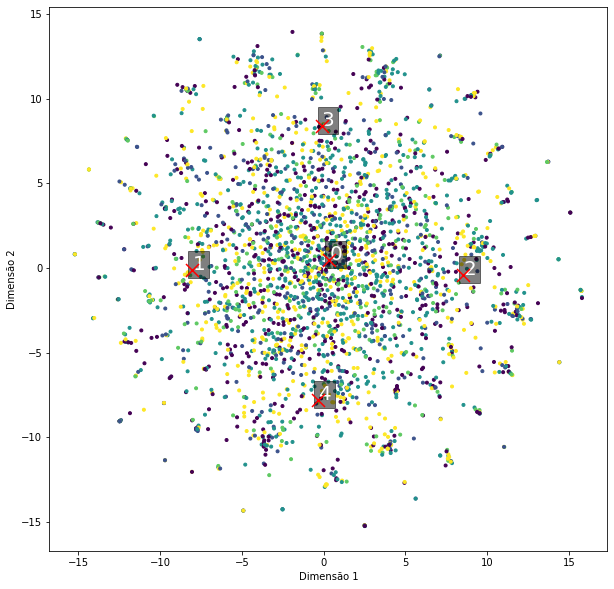

In [ ]:
tsne = TSNE(n_components=2, verbose=0,perplexity=71)
all_features_tsne_30_scaled = tsne.fit_transform(scaled_all_features_shuffled)

kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(all_features_tsne_30_scaled)
kmeans_preds_scaled2=kmeans.predict(all_features_tsne_30_scaled)

centroids = kmeans.cluster_centers_
clusters = np.unique(kmeans_preds_scaled2)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(10,10))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# ploting the cluster numbers
for i in range(clusters.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], clusters[i], fontsize=20, color='white', bbox=dict(facecolor='black', alpha=0.5))
    
plt.scatter(all_features_tsne_30_scaled[:,0],all_features_tsne_30_scaled[:,1],c=kmeans_preds_scaled1,marker='.')
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

In [ ]:
shuffle_silhouette = metrics.silhouette_score(scaled_all_features, kmeans_preds_scaled1, metric='euclidean')
shuffle_silhouette

0.11052729399391888

In [ ]:
shuffle_silhouette_shuffle = metrics.silhouette_score(scaled_all_features, kmeans_preds_scaled2, metric='euclidean')
shuffle_silhouette_shuffle

-0.028205528156823267

In [ ]:
metrics.rand_score(kmeans_preds_scaled1,kmeans_preds_scaled2)

0.6643449242985926

## Features Selection

In [ ]:
varModel=VarianceThreshold(threshold=0) #Setting variance threshold to 0 which means features that have same value in all samples.
varModel.fit(train1)

VarianceThreshold(threshold=0)

In [ ]:
constArr=varModel.get_support()
constArr
collections.Counter(constArr)

Counter({True: 125, False: 7})

In [ ]:
constCol=[col for col in train1.columns if col not in train1.columns[constArr]]
constCol

[19, 20, 21, 22, 23, 66, 67]

In [ ]:
train1.drop(columns=constCol,axis=1,inplace=True)

In [ ]:
train1.shape

(2762, 125)

In [ ]:
#The method will find the duplicate columns and return name of duplicated columns in an array
def duplicateColumns(data):
    dupliCols=[]
    for i in range(0,len(data.columns)):
        col1=data.columns[i]
        for col2 in data.columns[i+1:]:
            if data[col1].equals(data[col2]):
                dupliCols.append(col1+","+col2)
    return dupliCols

In [ ]:
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    #print(col_corr)
    corr_matrix=dataset.corr() #finding the correlation between columns.
    #print(corr_matrix)
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names

In [ ]:
col=correlation(train1,0.7)
print('Correlated columns:',col)
print(len(col))

set()
Correlated columns: {1, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 29, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 57, 60, 61, 64, 65, 69, 72, 75, 76, 78, 79, 81, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131}
85


In [ ]:
train1=train1.drop(columns=col,axis=1)
train1

,0,2,3,5,7,17,18,24,25,26,...,68,70,71,73,74,77,80,82,90,95
0,-0.029878,-0.807088,1.485474,0.237859,0.182489,-1.366984,-0.477658,-0.102424,-0.048739,-0.019031,...,-0.08251,-0.353292,-0.327233,-0.341950,-1.011915,0.134329,0.175658,-1.530612,1.697474,0.245226
1,-0.017314,0.409309,-0.318526,0.055488,-0.585179,1.063640,-0.128008,-0.102424,-0.048739,-0.019031,...,-0.08251,-0.353292,-0.327233,-0.341950,-0.401043,0.401411,0.175658,0.101184,0.003885,-0.210384
2,-0.028025,-0.538316,-0.407152,0.055501,-0.161929,0.458335,0.360295,-0.102424,-0.048739,-0.019031,...,-0.08251,-0.353292,-0.327233,-0.341950,-0.050262,0.162569,0.175658,-0.393259,1.113873,0.005029
3,-0.032613,-1.003291,-0.439379,-0.223946,0.663995,2.191116,0.422365,-0.102424,-0.048739,-0.019031,...,-0.08251,-0.353292,-0.327233,-0.341950,0.137561,-0.390134,0.175658,0.197591,-0.665504,0.252579
4,-0.034579,-1.177191,-0.458178,0.116251,2.902369,0.257666,1.952404,-0.102424,-0.048739,-0.019031,...,-0.08251,-0.353292,-0.327233,-0.341950,1.164870,-0.219833,0.175658,0.132022,-1.002225,1.568123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,-0.035093,-1.015188,0.102747,-0.449813,0.924008,-1.366984,-0.477658,-0.102424,-0.048739,-0.019031,...,-0.08251,-0.353292,-0.327233,-0.341950,-1.011915,0.134329,0.175658,-1.530612,1.697474,-0.059875
2758,-0.031358,-0.447367,-0.391038,-0.365805,-0.301768,1.648765,-0.140149,-0.102424,-0.048739,-0.019031,...,-0.08251,-0.353292,-0.327233,-0.341950,-0.671329,0.301588,0.175658,-0.607781,-1.294438,-0.231804
2759,-0.014845,-0.125019,-0.361496,0.443084,-0.467827,0.556714,-0.237057,-0.102424,-0.048739,-0.019031,...,-0.08251,0.359486,1.250109,0.130756,0.074953,-0.038973,0.175658,-0.351728,-0.905788,-0.031708
2760,-0.033851,-0.907985,0.432802,-0.285667,0.447984,-1.366984,-0.477658,-0.102424,-0.048739,-0.019031,...,-0.08251,-0.353292,-0.327233,-0.341950,-1.011915,0.134329,-0.507945,-1.530612,1.697474,-0.010839


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


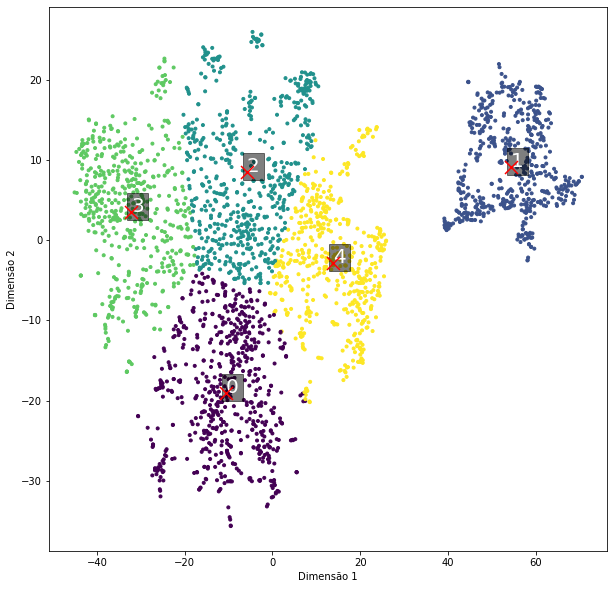

In [ ]:
tsne = TSNE(n_components=2, verbose=0,perplexity=71)
all_features_tsne_30_scaled = tsne.fit_transform(train1)

kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(all_features_tsne_30_scaled)
kmeans_preds_scaled=kmeans.predict(all_features_tsne_30_scaled)

centroids = kmeans.cluster_centers_
clusters = np.unique(kmeans_preds_scaled)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(10,10))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# ploting the cluster numbers
for i in range(clusters.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], clusters[i], fontsize=20, color='white', bbox=dict(facecolor='black', alpha=0.5))
    
plt.scatter(all_features_tsne_30_scaled[:,0],all_features_tsne_30_scaled[:,1],c=kmeans_preds_scaled,marker='.')
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

In [ ]:
kmeans_silhouette = metrics.silhouette_score(all_features_tsne_30_scaled, kmeans_preds_scaled, metric='euclidean')
kmeans_silhouette

0.47763655

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


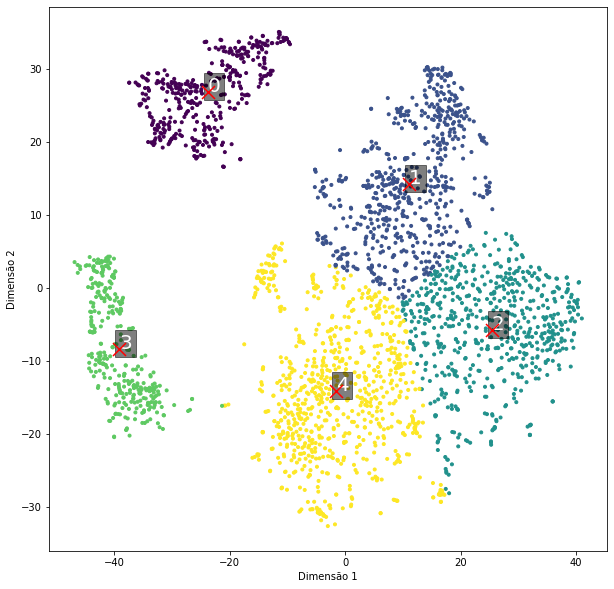

In [ ]:
tsne = TSNE(n_components=2, verbose=0,perplexity=71)
all_features_tsne_30_scaled = tsne.fit_transform(scaled_all_features)

kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(all_features_tsne_30_scaled)
kmeans_preds_scaled1=kmeans.predict(all_features_tsne_30_scaled)

centroids = kmeans.cluster_centers_
clusters = np.unique(kmeans_preds_scaled1)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(10,10))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# ploting the cluster numbers
for i in range(clusters.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], clusters[i], fontsize=20, color='white', bbox=dict(facecolor='black', alpha=0.5))
    
plt.scatter(all_features_tsne_30_scaled[:,0],all_features_tsne_30_scaled[:,1],c=kmeans_preds_scaled1,marker='.')
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

In [ ]:
kmeans_silhouette = metrics.silhouette_score(all_features_tsne_30_scaled, kmeans_preds_scaled1, metric='euclidean')
kmeans_silhouette

0.5061308

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score

In [ ]:
val = adjusted_rand_score(kmeans_preds_scaled1, kmeans_preds_scaled)
val

0.36562680100144823

In [ ]:
val = rand_score(kmeans_preds_scaled1, kmeans_preds_scaled)
val

0.7900250751322929

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
conf_matrix = confusion_matrix(kmeans_preds_scaled1,kmeans_preds_scaled)
print(conf_matrix)

[[  0 395   0   0   5]
 [ 54   2 176  11 380]
 [ 11   0 156 416  32]
 [187 134   8   5   1]
 [373   0 237  84  95]]


In [ ]:
from scipy.optimize import linear_sum_assignment

In [ ]:
row_ind, col_ind=linear_sum_assignment(-conf_matrix)


In [ ]:
conf_matrix1 = conf_matrix.iloc[:,0]
conf_matrix1

In [ ]:
col_ind

array([1, 4, 3, 0, 2])

In [ ]:
row_ind

array([0, 1, 2, 3, 4])

In [ ]:
a = conf_matrix[:,col_ind]
a

array([[395,   5,   0,   0,   0],
       [  2, 380,  11,  54, 176],
       [  0,  32, 416,  11, 156],
       [134,   1,   5, 187,   8],
       [  0,  95,  84, 373, 237]])

In [ ]:
k1 = kmeans_preds_scaled

In [ ]:
a = kmeans_preds_scaled
a = np.select([a == col_ind[0], a == col_ind[1], a == col_ind[2], a == col_ind[3],a == col_ind[4]], row_ind, a)
a

array([0, 4, 4, ..., 2, 0, 0])

In [ ]:
conf_matrix1 = confusion_matrix(kmeans_preds_scaled1,a)
print(conf_matrix1)

[[395   5   0   0   0]
 [  2 380  11  54 176]
 [  0  32 416  11 156]
 [134   1   5 187   8]
 [  0  95  84 373 237]]


In [ ]:
val = rand_score(kmeans_preds_scaled1, a)
val

0.7900250751322929

In [ ]:
val = 1- adjusted_rand_score(kmeans_preds_scaled1, a)
val

0.6343731989985517

## t-SNE shuffle

In [ ]:
sil_val = []
sil = 0
ch_val = []
ch = 0
db_val = []
db = 0

for i in range(1,101):
  all_features_shuffled = shuffle(all_features)

  # Scale data before applying PCA
  scaling=StandardScaler()
  
  # Use fit and transform method
  scaling.fit(all_features_shuffled)
  scaled_all_features_shuffled=scaling.transform(all_features_shuffled)

  tsne = TSNE(n_components=2, verbose=0,perplexity=71)
  all_features_tsne_30 = tsne.fit_transform(scaled_all_features_shuffled)

  kmeans=KMeans(init='k-means++',n_clusters=5)
  kmeans.fit(all_features_tsne_30)
  tsne_shuffle1_data_71=kmeans.predict(all_features_tsne_30)

  sil = metrics.silhouette_score(all_features_tsne_30, tsne_shuffle1_data_71, metric='euclidean')
  sil_val.append(sil)

  ch = metrics.calinski_harabasz_score(all_features_tsne_30, tsne_shuffle1_data_71)
  ch_val.append(ch)

  db = metrics.davies_bouldin_score(all_features_tsne_30, tsne_shuffle1_data_71)
  db_val.append(db)

  print(i)

/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


1


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


2


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


3


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


4


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


5


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


6


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


7


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


8


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


9


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


10


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


11


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


12


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


13


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


14


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


15


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


16


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


17


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


18


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


19


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


20


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


21


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


22


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


23


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


24


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


25


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


26


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


27


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


28


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


29


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


30


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


31


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


32


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


33


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


34


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


35


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


36


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


37


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


38


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


39


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


40


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


41


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


42


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


43


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


44


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


45


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


46


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


47


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


48


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


49


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


50


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


51


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


52


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


53


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


54


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


55


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


56


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


57


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


58


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


59


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


60


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


61


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


62


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


63


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


64


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


65


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


66


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


67


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


68


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


69


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


70


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


71


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


72


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


73


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


74


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


75


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


76


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


77


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


78


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


79


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


80


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


81


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


82


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


83


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


84


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


85


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


86


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


87


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


88


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


89


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


90


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


91


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


92


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


93


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


94


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


95


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


96


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


97


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


98


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


99


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


100


In [ ]:
print(sil_val)
print(ch_val)
print(db_val)

[0.334097, 0.3337865, 0.33158988, 0.3254698, 0.32874367, 0.3303327, 0.32525635, 0.3297729, 0.33588102, 0.33059797, 0.33313006, 0.32908484, 0.33226338, 0.33411908, 0.32809544, 0.3279442, 0.33065006, 0.33091173, 0.33007285, 0.33661056, 0.32613364, 0.33247387, 0.3279951, 0.32717818, 0.33626765, 0.3294549, 0.33576557, 0.32737875, 0.325168, 0.3264093, 0.33211422, 0.32961273, 0.32879785, 0.33330724, 0.33305526, 0.32753724, 0.33317634, 0.33174038, 0.3336716, 0.3291572, 0.33456442, 0.33501655, 0.32719052, 0.3323725, 0.33083034, 0.32585648, 0.33573502, 0.32958546, 0.33576426, 0.33653697, 0.33813152, 0.33033624, 0.33250627, 0.33378515, 0.33103547, 0.33144966, 0.3351623, 0.33037034, 0.33033141, 0.33951887, 0.33087063, 0.33714452, 0.33013278, 0.33041343, 0.33155996, 0.3350594, 0.34089926, 0.3287012, 0.3315158, 0.32802716, 0.331443, 0.32947624, 0.328379, 0.33338666, 0.33362794, 0.33430758, 0.3304596, 0.3316148, 0.33247533, 0.32892534, 0.33221167, 0.337177, 0.32906267, 0.3249166, 0.32644677, 0.32778

In [ ]:
print(np.mean(sil_val))
print(np.mean(ch_val))
print(np.mean(db_val))

0.33118817
1721.0679797589119
0.8856668472671899


Text(0, 0.5, 'Contagem')

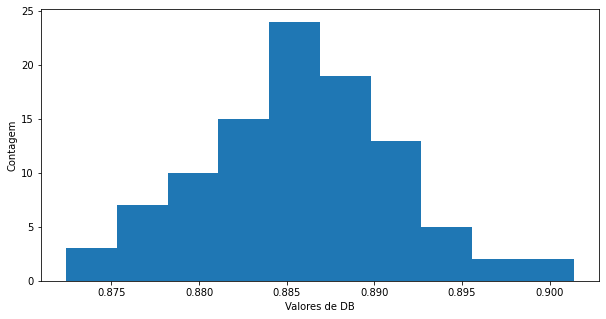

In [ ]:
plt.hist(db_val, bins='auto')
plt.xlabel("Valores de DB")
plt.ylabel("Contagem")

In [ ]:
from scipy import stats



*   1 maneira



In [ ]:
print(stats.kstest(sil_val, 'norm'))
print(stats.kstest(ch_val, 'norm'))
print(stats.kstest(db_val, 'norm'))

KstestResult(statistic=0.627377903958551, pvalue=1.355686498465526e-38)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.8085132219100799, pvalue=1.9872625553534465e-71)




*   2 maneira


In [ ]:
z = (sil_val-np.mean(sil_val)) / np.std(sil_val)
z1 = (ch_val-np.mean(ch_val)) / np.std(ch_val)
z2 = (db_val-np.mean(db_val)) / np.std(db_val)

In [ ]:
print(stats.kstest(z, 'norm'))
print(stats.kstest(z1, 'norm'))
print(stats.kstest(z2, 'norm'))

KstestResult(statistic=0.06152020691270643, pvalue=0.8209200422128825)
KstestResult(statistic=0.07454747513631232, pvalue=0.6079425221859722)
KstestResult(statistic=0.04121406899006519, pvalue=0.9931815340856134)


In [ ]:
print(np.std(sil_val))
print(np.std(ch_val))
print(np.std(db_val))

0.003495258
20.02272089043704
0.005451598602158699


In [ ]:
all_features_shuffled = shuffle(all_features)

/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:828: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results[i] = self.f(v)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


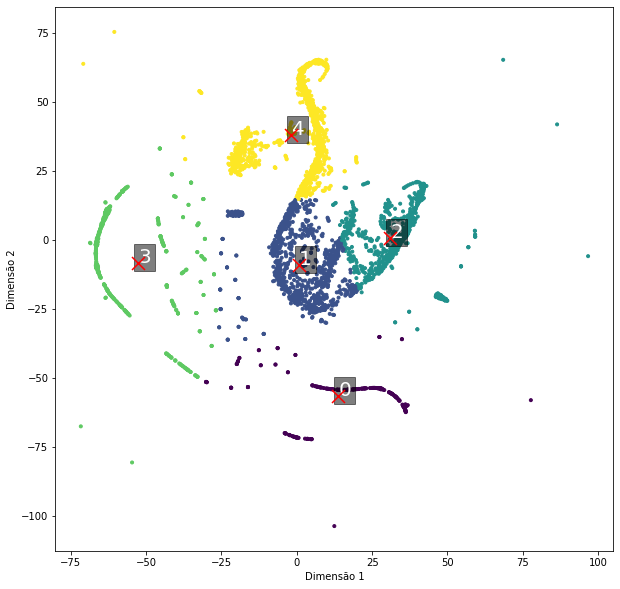

In [ ]:
tsne = TSNE(n_components=2, verbose=0,perplexity=71)
all_features_tsne_30 = tsne.fit_transform(all_features_shuffled)

kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(all_features_tsne_30)
tsne_shuffle1_data_71=kmeans.predict(all_features_tsne_30)

centroids = kmeans.cluster_centers_
clusters = np.unique(tsne_shuffle1_data_71)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(10,10))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# ploting the cluster numbers
for i in range(clusters.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], clusters[i], fontsize=20, color='white', bbox=dict(facecolor='black', alpha=0.5))
    
plt.scatter(all_features_tsne_30[:,0],all_features_tsne_30[:,1],c=tsne_shuffle1_data_71,marker='.')
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

In [ ]:
SIL1 = metrics.silhouette_score(all_features_tsne_30, tsne_shuffle1_data_71, metric='euclidean')
print(SIL1)
CH1 = metrics.calinski_harabasz_score(all_features_tsne_30, tsne_shuffle1_data_71)
print(CH1)
DB1 = metrics.davies_bouldin_score(all_features_tsne_30, tsne_shuffle1_data_71)
print(DB1)

0.50934666
4363.456857057583
0.6438370224616465


## Clusterização sem redução de dimensionalidade

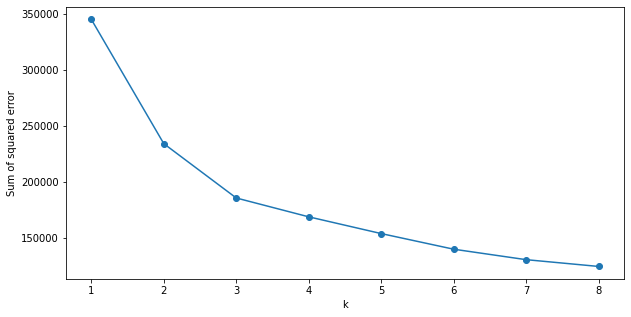

In [ ]:
k=list(range(1,9))
ssd=[]
for i in k:
    kmeans=KMeans(n_clusters=i).fit(scaled_all_features)
    ssd.append(kmeans.inertia_)
    
plt.plot(k,ssd,'o-')
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.show()

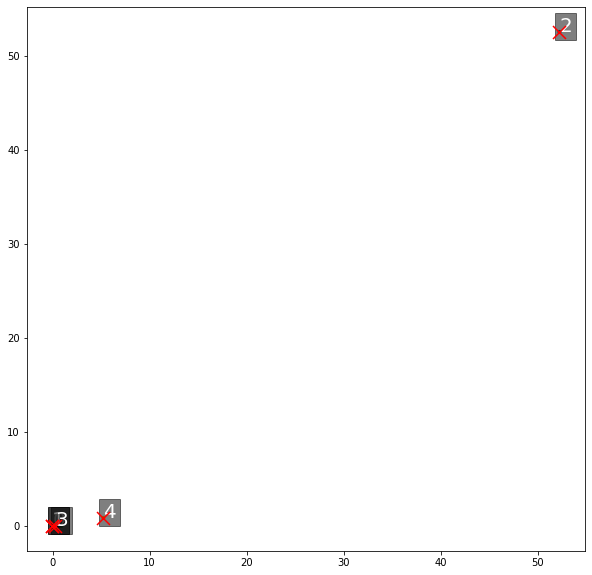

In [ ]:
# Predicts the clusters
kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(scaled_all_features)
kmeans_preds=kmeans.predict(scaled_all_features)

centroids = kmeans.cluster_centers_
clusters = np.unique(kmeans_preds)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(10,10))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# ploting the cluster numbers
for i in range(clusters.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], clusters[i], fontsize=20, color='white', bbox=dict(facecolor='black', alpha=0.5))
    
plt.scatter(scaled_all_features[:,0],scaled_all_features[:,1],c=kmeans_preds,marker='.')
#plt.scatter(scaled_all_features['P1'], scaled_all_features['P2'],  
           #c = KMeans(n_clusters = 3).fit_predict(scaled_all_features), cmap =plt.cm.winter) 
#plt.xlim(-1, 1)
plt.show()

In [ ]:
shuffle_silhouette = metrics.silhouette_score(scaled_all_features, kmeans_preds, metric='euclidean')
shuffle_silhouette

0.34662777467976197

In [ ]:
metrics.rand_score(kmeans_preds_scaled1,kmeans_preds)

0.4904379585207324

## t-SNE otimo + t-SNE shuffle + PCA + Eliminação de Dados + all_features



*   t-SNE otimo



In [ ]:
tsne = TSNE(n_components=2, verbose=0,perplexity=71)
all_features_tsne_30 = tsne.fit_transform(scaled_all_features)

kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(all_features_tsne_30)
tsne_pred_71=kmeans.predict(all_features_tsne_30)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
SIL1 = metrics.silhouette_score(all_features_tsne_30, tsne_pred_71, metric='euclidean')
print(SIL1)
CH1 = metrics.calinski_harabasz_score(all_features_tsne_30, tsne_pred_71)
print(CH1)
DB1 = metrics.davies_bouldin_score(all_features_tsne_30, tsne_pred_71)
print(DB1)

0.50855803
4182.417514021742
0.6508042902672158




*   t-SNE shuffle



In [ ]:
scaled_all_features_shuffled

tsne = TSNE(n_components=2, verbose=0,perplexity=71)
all_features_shuffle_tsne_30 = tsne.fit_transform(scaled_all_features_shuffled)

kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(all_features_shuffle_tsne_30)
tsne_pred_shuffle=kmeans.predict(all_features_shuffle_tsne_30)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
SIL2 = metrics.silhouette_score(all_features_tsne_30, tsne_pred_71, metric='euclidean')
print(SIL2)
CH2 = metrics.calinski_harabasz_score(all_features_tsne_30, tsne_pred_71)
print(CH2)
DB2 = metrics.davies_bouldin_score(all_features_tsne_30, tsne_pred_71)
print(DB2)

0.50855803
4182.417514021742
0.6508042902672158




*   PCA



In [ ]:
principal=PCA(n_components=2)
principal.fit(scaled_all_features)
all_features_pca=principal.transform(scaled_all_features)

kmeans=KMeans(init='k-means++',n_clusters=3)
kmeans.fit(all_features_pca)
pca_preds=kmeans.predict(all_features_pca)

In [ ]:
SIL3 = metrics.silhouette_score(all_features_pca, pca_preds, metric='euclidean')
print(SIL3)
CH3 = metrics.calinski_harabasz_score(all_features_pca, pca_preds)
print(CH3)
DB3 = metrics.davies_bouldin_score(all_features_pca, pca_preds)
print(DB3)

0.6554176554998116
7490.782058499584
0.3703977405188767




*   Eliminação de Features



In [ ]:
import collections
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train = scaled_all_features
train1 = pd.DataFrame(train)

varModel=VarianceThreshold(threshold=0) #Setting variance threshold to 0 which means features that have same value in all samples.
varModel.fit(train1)
constArr=varModel.get_support()
collections.Counter(constArr)
constCol=[col for col in train1.columns if col not in train1.columns[constArr]]

train1.drop(columns=constCol,axis=1,inplace=True)

def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names

col=correlation(train1,0.7)
train1=train1.drop(columns=col,axis=1)

#kmeans
kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(train1)
kmeans_preds_el_feature=kmeans.predict(train1)

In [ ]:
SIL4 = metrics.silhouette_score(train1, kmeans_preds_el_feature, metric='euclidean')
print(SIL4)
CH4 = metrics.calinski_harabasz_score(train1, kmeans_preds_el_feature)
print(CH4)
DB4 = metrics.davies_bouldin_score(train1, kmeans_preds_el_feature)
print(DB4)

0.12738604937756115
166.81527359618988
1.7533033437168792




*   All Features (sem redução de dimensionalidade)



In [ ]:
kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(scaled_all_features)
kmeans_preds_all_feature=kmeans.predict(scaled_all_features)

In [ ]:
SIL5 = metrics.silhouette_score(scaled_all_features, kmeans_preds_all_feature, metric='euclidean')
print(SIL5)
CH5 = metrics.calinski_harabasz_score(scaled_all_features, kmeans_preds_all_feature)
print(CH5)
DB5 = metrics.davies_bouldin_score(scaled_all_features, kmeans_preds_all_feature)
print(DB5)

0.19382701144978398
853.8283914111996
1.2491079667843152




*   ARI e RI



In [ ]:
RI21 = rand_score(tsne_pred_shuffle, tsne_pred_71)
print(RI21)
RI31 = rand_score(pca_preds, tsne_pred_71)
print(RI31)
RI41 = rand_score(kmeans_preds_el_feature, tsne_pred_71)
print(RI41)
RI51 = rand_score(kmeans_preds_all_feature, tsne_pred_71)
print(RI51)

RI32 = rand_score(pca_preds, tsne_pred_shuffle)
print(RI32)
RI42 = rand_score(kmeans_preds_el_feature, tsne_pred_shuffle)
print(RI42)
RI52 = rand_score(kmeans_preds_all_feature, tsne_pred_shuffle)
print(RI52)

RI43 = rand_score(kmeans_preds_el_feature, pca_preds)
print(RI43)
RI53 = rand_score(kmeans_preds_all_feature, pca_preds)
print(RI53)

RI54 = rand_score(kmeans_preds_all_feature, kmeans_preds_el_feature)
print(RI54)

print("----------------------------------------------------------------------")

ARI15 = adjusted_rand_score(tsne_pred_71, kmeans_preds_all_feature)
print(ARI15)
ARI25 = adjusted_rand_score(tsne_pred_shuffle, kmeans_preds_all_feature)
print(ARI25)
ARI35 = adjusted_rand_score(pca_preds, kmeans_preds_all_feature)
print(ARI35)
ARI45 = adjusted_rand_score(kmeans_preds_el_feature, kmeans_preds_all_feature)
print(ARI45)

ARI14 = adjusted_rand_score(tsne_pred_71, kmeans_preds_el_feature)
print(ARI14)
ARI24 = adjusted_rand_score(tsne_pred_shuffle, kmeans_preds_el_feature)
print(ARI24)
ARI34 = adjusted_rand_score(pca_preds, kmeans_preds_el_feature)
print(ARI34)

ARI13 = adjusted_rand_score(tsne_pred_71, pca_preds)
print(ARI13)
ARI23 = adjusted_rand_score(tsne_pred_shuffle, pca_preds)
print(ARI23)

ARI12 = adjusted_rand_score(tsne_pred_71, tsne_pred_shuffle)
print(ARI12)

0.665158207273598
0.49247680465026866
0.611509593250984
0.7014726952239754
0.41268013326196235
0.4851451936969389
0.5476156069553659
0.540555440013365
0.6691438446070894
0.5187001319978463
----------------------------------------------------------------------
0.34180895721348525
-0.0013382704933381842
0.3690840621155047
0.04503334742924449
0.2437663586882551
-0.0011908449270021783
0.06766922079746018
0.1306112301881777
-0.0005855792993787201
-0.0010471417775761395


## Caraterização dos Clusters 

In [ ]:
matrix = pd.read_csv("/content/drive/MyDrive/Tese/Final/Clusters/classificada.csv") 
matrix=matrix.drop(columns=['Unnamed: 0'])
matrix

,ID,product,country,company,timestamp,offer_type,price_euro,range_price,color,memory,display,camera,clusters
0,1,xiaomi Pocophone 128GB,CL,Falabella,2020-04-14,unlocked,727.726735,About 200 EUR,ND,128GB,5.99 inches,20MP,1
1,2,xiaomi Redmi Note 8 128GB,CO,Movistar,2021-01-22,unlocked,636.723369,About 600 EUR,ND,128GB,6.3 inches,13MP,4
2,3,xiaomi Redmi Note 8 128GB,CO,Tigo,2021-05-31,postpaid_new_line,600.291094,About 600 EUR,ND,128GB,6.3 inches,13MP,0
3,4,xiaomi Redmi Note 8 128GB,CO,wom,2021-06-01,unlocked,636.677886,About 600 EUR,ND,128GB,6.3 inches,13MP,0
4,5,xiaomi Redmi Note 8 128GB,CO,Claro,2021-07-03,unlocked,684.890385,About 600 EUR,ND,128GB,6.3 inches,13MP,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,2758,huawei Y9S 128GB,CL,wom,2020-12-22,postpaid_new_line,212.862731,About 250 EUR,ND,128GB,6.59 inches,16MP,1
2758,2759,huawei Y9S 128GB,PE,Claro,2020-06-20,unlocked,273.360000,About 250 EUR,ND,128GB,6.59 inches,16MP,0
2759,2760,huawei Y9S 128GB,CO,Claro,2020-06-21,unlocked,1063.313017,About 350 EUR,ND,128GB,6.59 inches,16MP,2
2760,2761,huawei Y9S 128GB,PE,Falabella,2020-06-21,unlocked,335.760000,About 200 EUR,ND,128GB,6.59 inches,16MP,1


In [ ]:
df4

,ID,product,country,company,timestamp,offer_type,price_euro,range_price,color,memory,...,0_Spectral variation,0_Standard deviation,0_Sum absolute diff,0_Total energy,0_Variance,0_Wavelet absolute mean_0,0_Wavelet energy_0,0_Wavelet entropy,0_Wavelet standard deviation_0,0_Wavelet variance_0
0,802,myphone Up Smart (3G),PT,Worten,2020-12-16,unlocked,64.990000,About 150 EUR,ND,64GB,...,0.826269,0.970896,43.120000,2.110167e+05,0.942639,0.446065,3.799922,1.965629,3.773650,14.240435
1,803,myphone Hammer Blade 3 64GB,PT,Worten,2020-12-16,unlocked,369.990000,About 50 EUR,ND,4GB,...,0.810995,16.452159,527.000000,6.762283e+06,270.673539,2.123412,22.563525,2.001700,22.463388,504.603804
2,806,nokia 5.3 64GB,CL,Movistar,2020-12-16,unlocked,181.924861,About 4200 EUR,ND,256GB,...,0.366117,12.432565,45.483489,1.313918e+06,154.568666,0.817128,8.018976,1.934652,7.977235,63.636285
3,807,nokia 5.3 64GB,CO,Movistar,2020-08-14,unlocked,712.225962,About 200 EUR,Charcoal / Cyan / Sand,64GB,...,0.439291,47.081849,1494.587465,1.570366e+07,2216.700515,2.130812,28.837189,2.045705,28.758357,827.043099
4,815,samsung Galaxy Note20 4G 256GB,CL,Movistar,2020-09-10,unlocked,909.660693,About 900 EUR,ND,256GB,...,0.134037,156.709773,1264.422815,2.948452e+07,24557.952838,2.859940,38.876972,1.962823,38.771635,1503.239662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,2745,huawei Y9S 128GB,CL,Movistar,2020-06-21,unlocked,272.891840,About 300 EUR,ND,128GB,...,0.374095,26.455971,354.771218,2.210668e+06,699.918417,0.751993,10.815829,1.969075,10.789655,116.416662
886,2747,huawei Y9S 128GB,CL,entel,2020-06-21,unlocked,316.346766,About 250 EUR,ND,128GB,...,0.649265,4.977972,21.832075,4.387831e+06,24.780202,1.622631,15.182994,1.940711,15.096038,227.890378
887,2749,huawei Y9S 128GB,CL,Claro,2020-06-21,unlocked,209.214955,About 300 EUR,ND,128GB,...,0.802789,8.149937,136.450468,2.412504e+06,66.421475,0.710111,8.963546,1.965006,8.935374,79.840901
888,2754,huawei Y9S 128GB,CO,Tigo,2020-06-21,unlocked,982.352406,About 200 EUR,ND,128GB,...,0.188283,56.247200,596.599654,4.120417e+07,3163.747473,6.531983,54.957683,1.980979,54.568124,2977.680109


In [ ]:
print(sum(df4['country']=="CL"))
print(sum(df4['country']=="CO"))
print(sum(df4['country']=="PE"))
print(sum(df4['country']=="PT"))

542
84
110
154


In [ ]:
print(sum(df0['offer_type']=="unlocked"))
print(sum(df0['offer_type']=="postpaid_portability"))
print(sum(df0['offer_type']=="postpaid_new_line"))
print(sum(df0['offer_type']=="postpaid_renew"))

609
49
76
1


In [ ]:
print(np.unique(df0['display']))

['1.7 inches' '1.8 inches' '10.2 inches' '10.5 inches' '12.9 inches'
 '3.2 inches' '4.5 inches' '4.7 inches' '5 inches' '5.2 inches'
 '5.3 inches' '5.34 inches' '5.4 inches' '5.45 inches' '5.5 inches'
 '5.6 inches' '5.7 inches' '5.71 inches' '5.8 inches' '5.9 inches'
 '5.99 inches' '6 inches' '6.1 inches' '6.15 inches' '6.2 inches'
 '6.21 inches' '6.26 inches' '6.3 inches' '6.39 inches' '6.4 inches'
 '6.44 inches' '6.47 inches' '6.5 inches' '6.51 inches' '6.52 inches'
 '6.53 inches' '6.55 inches' '6.58 inches' '6.59 inches' '6.6 inches'
 '6.63 inches' '6.67 inches' '6.7 inches' '6.8 inches' '6.9 inches'
 '7.6 inches' '8 inches' 'ND']


In [ ]:
print(sum(df0['display']=="ND"))

6


In [ ]:
print(np.unique(df0['camera']))
print(np.unique(df1['camera']))
print(np.unique(df2['camera']))
print(np.unique(df3['camera']))
print(np.unique(df4['camera']))

In [ ]:
print((sum(df0['camera']=="1.2MP"))+(sum(df0['camera']=="1.5MP"))+(sum(df0['camera']=="1.92MP"))+(sum(df0['camera']=="2MP"))+(sum(df0['camera']=="4.92MP")))
print((sum(df1['camera']=="1.2MP"))+(sum(df1['camera']=="1.5MP"))+(sum(df1['camera']=="1.92MP"))+(sum(df1['camera']=="2MP"))+(sum(df1['camera']=="4.92MP")))
print((sum(df2['camera']=="1.2MP"))+(sum(df2['camera']=="1.5MP"))+(sum(df2['camera']=="1.92MP"))+(sum(df2['camera']=="2MP"))+(sum(df2['camera']=="4.92MP")))
print((sum(df3['camera']=="1.2MP"))+(sum(df3['camera']=="1.5MP"))+(sum(df3['camera']=="1.92MP"))+(sum(df3['camera']=="2MP"))+(sum(df3['camera']=="4.92MP")))
print((sum(df4['camera']=="1.2MP"))+(sum(df4['camera']=="1.5MP"))+(sum(df4['camera']=="1.92MP"))+(sum(df4['camera']=="2MP"))+(sum(df4['camera']=="4.92MP")))

21
19
17
8
18


In [ ]:
print(np.unique(df4['memory']))

['128GB' '16GB' '16MB' '1TB' '256GB' '32GB' '32MB' '4GB' '4MB' '512GB'
 '64GB' '64MB' '8GB' '8MB' 'ND']


In [ ]:
print((sum(df0['memory']=="4MB"))+(sum(df0['memory']=="8MB"))+(sum(df0['memory']=="16MB"))+(sum(df0['memory']=="64MB"))+(sum(df0['memory']=="128MB"))+(sum(df0['memory']=="256MB")))

17


In [ ]:
print(np.mean(df0['price_euro']))

392.49536172548676


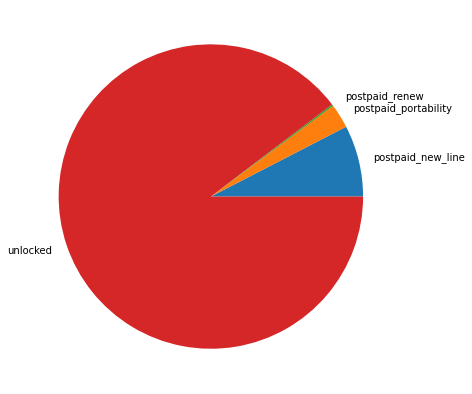

In [ ]:
a = np.unique(df0['offer_type'])[0]
b = np.unique(df0['offer_type'])[1]
c = np.unique(df0['offer_type'])[2]
d = np.unique(df0['offer_type'])[3]

tipos = ['postpaid_new_line', 'postpaid_portability', 'postpaid_renew', 'unlocked']
data = [sum(df0['offer_type']==np.unique(df0['offer_type'])[0]), sum(df0['offer_type']==np.unique(df0['offer_type'])[1]), sum(df0['offer_type']==np.unique(df0['offer_type'])[2]), sum(df0['offer_type']==np.unique(df0['offer_type'])[3])] 

fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = tipos) 
plt.show()

<BarContainer object of 25 artists>

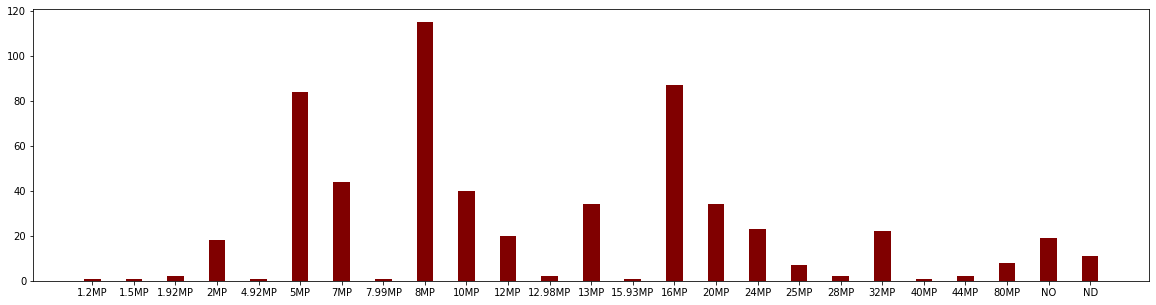

In [ ]:
list1=np.unique(df0['camera'])
list1[0]

list0 = []

#ordenar lista
for i in range(0,len(list1)):
  if (list1[i] == "NO") or (list1[i] == "ND"):
    #list0.append(list1[i])
    print("")
  else:
    #if type(list1[i]) == float:
    list0.append(pd.to_numeric((list1[i].split("MP")[0])))
    #else :
    #  list0.append(int(list1[i].split("MP")[0]))

list0.sort()
list0.append("NO")
list0.append("ND")
list1 = []

for i in range(0,len(list0)):
  if(list0[i] == "NO") or (list0[i] == "ND"):
    list1.append(list0[i])
  else:
    list1.append(str(list0[i])+"MP")


dic_m0 = {}

for i in range(0,len(list1)):
  dic_m0[list1[i]] = sum(df0['camera']== list1[i])

fig = plt.figure(figsize = (20, 5))
plt.bar(list(dic_m0.keys()), list(dic_m0.values()), color ='maroon',width = 0.4,align='center')

In [ ]:
print(np.unique(df0['memory']))
print(np.unique(df1['memory']))
print(np.unique(df2['memory']))
print(np.unique(df3['memory']))
print(np.unique(df4['memory']))

NameError: ignored

<BarContainer object of 14 artists>

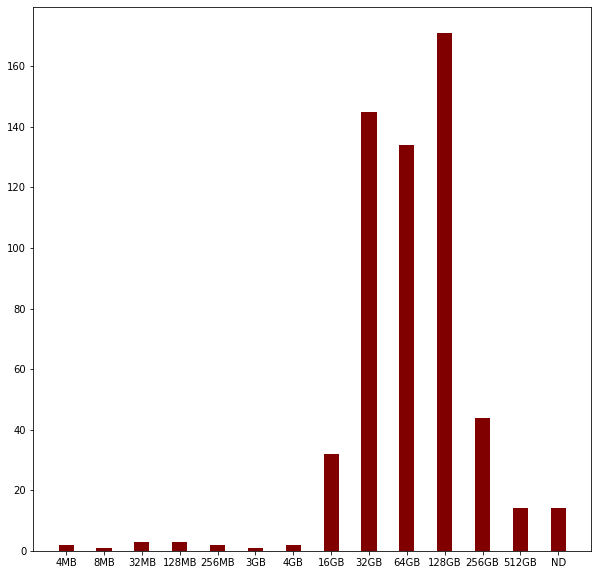

In [ ]:
a = sum(df0['memory']=="4MB")
b = sum(df0['memory']=="8MB")
c = sum(df0['memory']=="32MB")
d = sum(df0['memory']=="128MB")
e = sum(df0['memory']=="256MB")
f = sum(df0['memory']=="3GB")
g = sum(df0['memory']=="4GB")
h = sum(df0['memory']=="16GB")
i = sum(df0['memory']=="32GB")
j = sum(df0['memory']=="64GB")
k = sum(df0['memory']=="128GB")
l = sum(df0['memory']=="256GB")
m = sum(df0['memory']=="512GB")
n = sum(df0['memory']=="ND")

data = {'4MB':a, '8MB':b, '32MB':c,'128MB':d,'256MB':e, '3GB':f, '4GB':g,'16GB':h,'32GB':i, '64GB':j, '128GB':k,'256GB':l,'512GB':m, 'ND':n}
#paises = {'CL','CO','PE','PT'}


#values = {a,b,c,d}


fig = plt.figure(figsize = (10, 10))
plt.bar(list(data.keys()), list(data.values()), color ='maroon',width = 0.4)

In [ ]:
list1

['1.7 inches',
 '1.77 inches',
 '1.8 inches',
 '2.4 inches',
 '4 inches',
 '4.3 inches',
 '4.5 inches',
 '4.7 inches',
 '5 inches',
 '5.1 inches',
 '5.2 inches',
 '5.3 inches',
 '5.34 inches',
 '5.4 inches',
 '5.45 inches',
 '5.5 inches',
 '5.6 inches',
 '5.7 inches',
 '5.71 inches',
 '5.8 inches',
 '5.84 inches',
 '5.9 inches',
 '5.94 inches',
 '5.99 inches',
 '6 inches',
 '6.01 inches',
 '6.09 inches',
 '6.1 inches',
 '6.15 inches',
 '6.2 inches',
 '6.21 inches',
 '6.22 inches',
 '6.26 inches',
 '6.3 inches',
 '6.39 inches',
 '6.4 inches',
 '6.44 inches',
 '6.47 inches',
 '6.5 inches',
 '6.51 inches',
 '6.52 inches',
 '6.53 inches',
 '6.55 inches',
 '6.57 inches',
 '6.59 inches',
 '6.6 inches',
 '6.63 inches',
 '6.67 inches',
 '6.7 inches',
 '6.8 inches',
 '6.9 inches',
 '7 inches',
 '7.3 inches',
 '7.6 inches',
 '8 inches',
 '11 inches',
 'ND']

<BarContainer object of 57 artists>

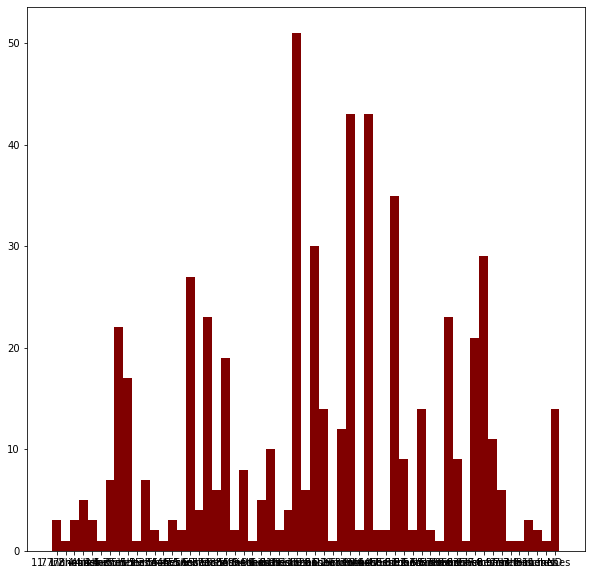

In [ ]:
list1=np.unique(df0['display'])
list1[0]

list0 = []

#ordenar lista
for i in range(0,len(list1)):
  if (list1[i] == "ND"):
    #list0.append(list1[i])
    print("")
  else:
    #if type(list1[i]) == float:
    list0.append(pd.to_numeric((list1[i].split(" inches")[0])))
    #else :
    #  list0.append(int(list1[i].split("MP")[0]))

list0.sort()
list0.append("ND")
list1 = []

for i in range(0,len(list0)):
  if(list0[i] == "ND"):
    list1.append(list0[i])
  else:
    list1.append(str(list0[i])+" inches")


dic_m0 = {}

for i in range(0,len(list1)):
  dic_m0[list1[i]] = sum(df0['display']== list1[i])

fig = plt.figure(figsize = (10, 10))
plt.bar(list(dic_m0.keys()), list(dic_m0.values()), color ='maroon',width = 1,align='center')

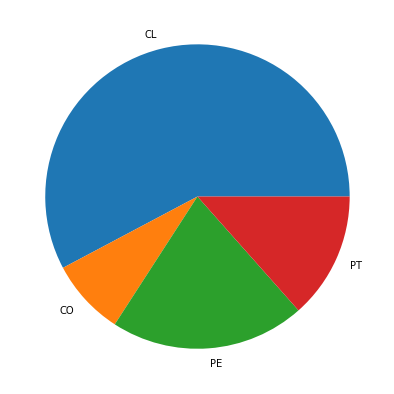

In [ ]:
paises = ['CL', 'CO', 'PE', 'PT'] 
  
data = [sum(df0['country']=="CL"), sum(df0['country']=="CO"), sum(df0['country']=="PE"), sum(df0['country']=="PT")] 

fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = paises) 
plt.show()

<BarContainer object of 4 artists>

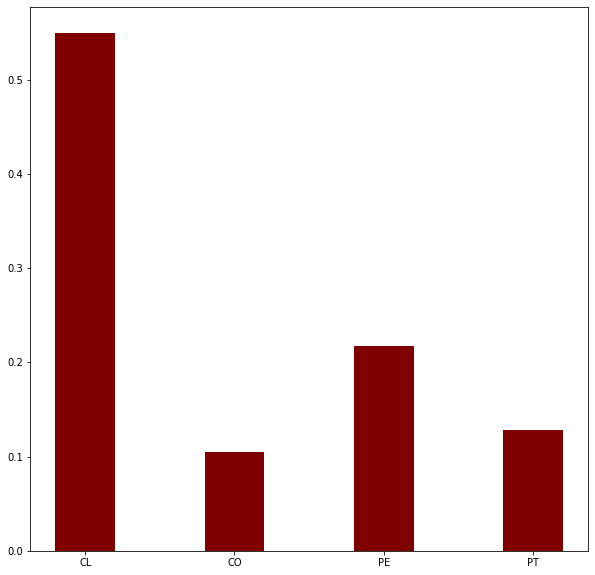

In [ ]:
a = sum(df0['country']=="CL")
b = sum(df0['country']=="CO")
c = sum(df0['country']=="PE")
d = sum(df0['country']=="PT")

#z=a+b+c+d
#data = {'CL':a/z, 'CO':b/z, 'PE':c/z,'PT':d/z}

data = {'CL':a, 'CO':b, 'PE':c,'PT':d}

fig = plt.figure(figsize = (10, 10))
plt.bar(list(data.keys()), list(data.values()), color ='maroon',width = 0.4)

Text(0, 0.5, 'Amostras')

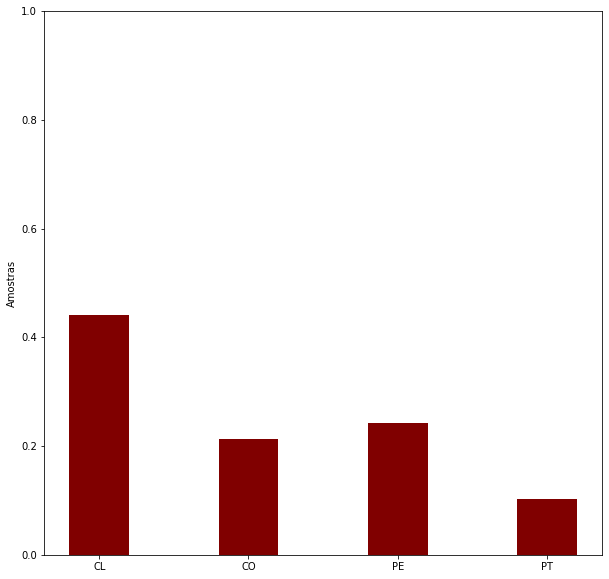

In [ ]:
a0 = 324
b0 = 157
c0 = 178
d0 = 76

a1 = 190
b1 = 11
c1 = 69
d1 = 46

a2 = 293
b2 = 67
c2 = 77
d2 = 144

a3 = 143
b3 = 20
c3 = 40
d3 = 37

a4 = 542
b4 = 84
c4 = 110
d4 = 154

z=a0+b0+c0+d0
#data = {'CL':a/z, 'CO':b/z, 'PE':c/z,'PT':d/z}

data = {'CL':a0/z, 'CO':b0/z, 'PE':c0/z,'PT':d0/z}

fig = plt.figure(figsize = (10, 10))
plt.bar(list(data.keys()), list(data.values()), color ='maroon',width = 0.4)
plt.ylim(0, 1)
plt.ylabel("Amostras")

In [ ]:
print(max(df0['price_euro']))
print(min(df0['price_euro']))
print(np.std(df0['price_euro']))
print(np.mean(df0['price_euro']))

5308.787410170108
0.96
694.9881720694736
587.6904096626083


In [ ]:
list_camera = []
for i in range(0,len(df0["camera"])):
  #try type(df0["camera"][i]) == int:
   #  list_camera.append(df0["camera"][i].split("MP")[0]) 
  list_camera.append(str(df0["camera"][i]).split("MP")[0])
 # try:
  #  int(df0["camera"][i])
   # list_camera.append(df0["camera"][i].split("MP")[0])

print(list_camera)
print(min(list_camera))
print(max(list_camera))
print(np.mean(list_camera))
print(np.std(list_camera))  

['13', '20', '20', '20', '20', '16', '5', '5', '32', '32', '32', '5', '8', '8', '8', '16', '32', '13', '13', '13', '8', '8', '8', '16', '16', '8', '5', '5', '5', '8', '8', '8', '8', '24', '24', '16', '12', '8', 'NO', '32', '10', '10', '10', '12', '12', '10', '10', '10', '10', '32', 'ND', '32', '32', '32', '32', '8', '8', '13', '32', '32', '10', '10', '10', 'VGA', '16', '8', '7', '13', '24', '24', '24', '24', '24', '24', '24', '24', '24', '8', '8', '8', '7', '32', '32', '32', '5', '5', '5', '5', '8', '8', '32', '32', '32', '32', '16', '16', '8', '16', '32', '32', '32', '32', '16', '8', '8', '24', '2', 'NO', '8', '8', '10', '10', '10', '10', '10', '10', '10', '10', '10', 'NO', '8', '8', '8', '16', '16', '13', '13', '8', '10', '13', '13', 'ND', '5', 'NO', '2', 'ND', 'ND', '16', '7', '8', 'NO', 'NO', '20', '1.92', '5', '5', '13', '8', '5', '16', '8', '8', '10', '2', '8', '5', '10', '12', '12', '8', '12', '12', '8', '8', '5', '16', '16', '16', '12', '13', '5', '12', '12', '12', '5', '5', '1

TypeError: ignored

## Caraterização dos Clusters Features

In [ ]:
matrix = pd.read_csv("/content/drive/MyDrive/Tese/Final/Clusters/classificada.csv") 
matrix=matrix.drop(columns=['Unnamed: 0'])
matrix

,ID,product,country,company,timestamp,offer_type,price_euro,range_price,color,memory,display,camera,clusters
0,1,xiaomi Pocophone 128GB,CL,Falabella,2020-04-14,unlocked,727.726735,About 200 EUR,ND,128GB,5.99 inches,20MP,1
1,2,xiaomi Redmi Note 8 128GB,CO,Movistar,2021-01-22,unlocked,636.723369,About 600 EUR,ND,128GB,6.3 inches,13MP,4
2,3,xiaomi Redmi Note 8 128GB,CO,Tigo,2021-05-31,postpaid_new_line,600.291094,About 600 EUR,ND,128GB,6.3 inches,13MP,0
3,4,xiaomi Redmi Note 8 128GB,CO,wom,2021-06-01,unlocked,636.677886,About 600 EUR,ND,128GB,6.3 inches,13MP,0
4,5,xiaomi Redmi Note 8 128GB,CO,Claro,2021-07-03,unlocked,684.890385,About 600 EUR,ND,128GB,6.3 inches,13MP,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,2758,huawei Y9S 128GB,CL,wom,2020-12-22,postpaid_new_line,212.862731,About 250 EUR,ND,128GB,6.59 inches,16MP,1
2758,2759,huawei Y9S 128GB,PE,Claro,2020-06-20,unlocked,273.360000,About 250 EUR,ND,128GB,6.59 inches,16MP,0
2759,2760,huawei Y9S 128GB,CO,Claro,2020-06-21,unlocked,1063.313017,About 350 EUR,ND,128GB,6.59 inches,16MP,2
2760,2761,huawei Y9S 128GB,PE,Falabella,2020-06-21,unlocked,335.760000,About 200 EUR,ND,128GB,6.59 inches,16MP,1


In [ ]:
print(sum(matrix['clusters']==4))

627


In [ ]:
all_features = pd.read_csv("/content/drive/MyDrive/Tese/Final/all_features.csv") 
all_features=all_features.drop(columns=['Unnamed: 0'])
all_features

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,0_ECDF_2,...,0_Wavelet standard deviation_8,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8
0,1164.362776,4.289648e+07,0.800000,727.726735,727.726735,727.726735,727.726735,0.012346,0.024691,0.037037,...,419.753894,4743.853666,16096.582474,33283.966509,54824.133297,79255.073381,105118.581397,130957.248417,155313.906196,176193.331756
1,3487.244037,1.091783e+08,2.728929,56.000000,224.000000,591.184390,636.723369,0.003559,0.007117,0.010676,...,256.154800,1045.266512,3723.860893,8096.916486,14085.904264,21598.996534,30566.436184,40947.950179,52671.403019,65615.281732
2,1507.008096,4.876461e+07,1.226211,23.000000,95.000000,591.194396,684.890385,0.008403,0.016807,0.025210,...,379.271274,2723.354430,9477.926457,20120.469052,34113.940571,51003.018692,70578.446551,92795.992478,117427.339305,143846.699549
3,658.700992,2.070793e+07,0.488866,11.000000,44.000000,381.970345,684.890385,0.017857,0.035714,0.053571,...,333.528828,4825.581085,16238.101497,29429.311237,38674.323394,51672.753635,70116.781661,88410.170696,101954.991546,111241.479394
4,295.084144,1.034271e+07,0.213100,4.000000,18.000000,636.677886,684.890385,0.043478,0.086957,0.130435,...,334.717938,12285.093156,31476.442874,40366.014766,41077.280361,42347.708707,53285.024793,72181.067498,93172.150980,112036.098316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,200.090967,2.174906e+06,0.470000,212.862731,212.862731,212.862731,212.862731,0.020833,0.041667,0.062500,...,101.284721,663.429796,2135.456661,4160.910228,6380.996792,8440.020751,9990.824818,10766.236113,10750.871297,10258.594638
2758,890.683200,1.377810e+07,1.370436,29.000000,117.000000,275.760000,338.160000,0.006803,0.013605,0.020408,...,150.909722,422.901059,1430.357451,2704.411969,4753.468142,7957.095709,11892.713908,15921.208882,19595.896023,22773.744307
2759,3943.695079,1.935120e+08,1.881606,40.000000,163.000000,881.379059,998.726462,0.004902,0.009804,0.014706,...,468.071918,3826.091662,13142.837044,28425.454557,49725.565931,75960.531607,106174.287108,140012.797196,177527.140938,219091.320312
2760,429.772800,7.327761e+06,0.640000,335.760000,335.760000,335.760000,335.760000,0.015385,0.030769,0.046154,...,187.943610,1244.281047,4145.942142,8405.276870,13533.902168,19048.828255,24468.088118,29169.425434,32951.488636,35322.800497


In [ ]:
all_features2=all_features

In [ ]:
all_features2=all_features.drop(columns=['0_ECDF Percentile Count_1','0_ECDF Percentile_1'])
all_features2=all_features2.drop(columns=['0_ECDF_1','0_ECDF_2','0_ECDF_3','0_ECDF_4','0_ECDF_5','0_ECDF_6','0_ECDF_7','0_ECDF_8','0_ECDF_9'])
all_features2=all_features2.drop(columns=['0_Histogram_1','0_Histogram_2','0_Histogram_3','0_Histogram_4','0_Histogram_5','0_Histogram_6','0_Histogram_7','0_Histogram_8','0_Histogram_9'])
all_features2=all_features2.drop(columns=['0_LPCC_1','0_LPCC_10','0_LPCC_11','0_LPCC_12','0_LPCC_2','0_LPCC_3','0_LPCC_4','0_LPCC_5','0_LPCC_6','0_LPCC_7','0_LPCC_8','0_LPCC_9'])
all_features2=all_features2.drop(columns=['0_MFCC_1','0_MFCC_10','0_MFCC_11','0_MFCC_2','0_MFCC_3','0_MFCC_4','0_MFCC_5','0_MFCC_6','0_MFCC_7','0_MFCC_8','0_MFCC_9'])
all_features2=all_features2.drop(columns=['0_Wavelet absolute mean_1','0_Wavelet absolute mean_2','0_Wavelet absolute mean_3','0_Wavelet absolute mean_4','0_Wavelet absolute mean_5','0_Wavelet absolute mean_6','0_Wavelet absolute mean_7','0_Wavelet absolute mean_8'])
all_features2=all_features2.drop(columns=['0_Wavelet energy_1','0_Wavelet energy_2','0_Wavelet energy_3','0_Wavelet energy_4','0_Wavelet energy_5','0_Wavelet energy_6','0_Wavelet energy_7','0_Wavelet energy_8'])
all_features2=all_features2.drop(columns=['0_Wavelet standard deviation_1','0_Wavelet standard deviation_2','0_Wavelet standard deviation_3','0_Wavelet standard deviation_4','0_Wavelet standard deviation_5','0_Wavelet standard deviation_6','0_Wavelet standard deviation_7','0_Wavelet standard deviation_8'])
all_features2=all_features2.drop(columns=['0_Wavelet variance_1','0_Wavelet variance_2','0_Wavelet variance_3','0_Wavelet variance_4','0_Wavelet variance_5','0_Wavelet variance_6','0_Wavelet variance_7','0_Wavelet variance_8'])
all_features2

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile_0,0_ECDF_0,0_Entropy,0_Fundamental frequency,0_Histogram_0,0_Human range energy,...,0_Spectral variation,0_Standard deviation,0_Sum absolute diff,0_Total energy,0_Variance,0_Wavelet absolute mean_0,0_Wavelet energy_0,0_Wavelet entropy,0_Wavelet standard deviation_0,0_Wavelet variance_0
0,1164.362776,4.289648e+07,0.800000,727.726735,727.726735,0.012346,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,2.681030e+07,0.000000,14.722488,70.431565,1.931687,68.875639,4743.853666
1,3487.244037,1.091783e+08,2.728929,56.000000,591.184390,0.003559,0.293208,0.359712,0.0,0.000356,...,0.485917,28.119368,251.124352,1.949612e+07,790.698866,3.586288,32.528879,1.939308,32.330582,1045.266512
2,1507.008096,4.876461e+07,1.226211,23.000000,591.194396,0.008403,0.220190,0.862069,0.0,0.002027,...,0.822850,44.508607,271.991267,2.066297e+07,1981.016080,8.851492,52.931119,1.946261,52.185768,2723.354430
3,658.700992,2.070793e+07,0.488866,11.000000,381.970345,0.017857,0.429217,0.925926,0.0,0.014109,...,0.282726,114.505475,436.641499,1.882539e+07,13111.503856,14.902206,71.046864,1.974238,69.466403,4825.581085
4,295.084144,1.034271e+07,0.213100,4.000000,636.677886,0.043478,0.195983,2.500000,0.0,0.999460,...,0.180515,22.184049,48.212499,2.350616e+07,492.132033,47.057259,120.413781,1.889232,110.838139,12285.093156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,200.090967,2.174906e+06,0.470000,212.862731,212.862731,0.020833,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,2.313730e+06,0.000000,7.265075,26.762121,1.902830,25.757131,663.429796
2758,890.683200,1.377810e+07,1.370436,29.000000,275.760000,0.006803,0.363792,0.347222,0.0,0.000548,...,0.091815,28.506160,213.600000,4.718528e+06,812.601150,3.062719,20.791376,1.975069,20.564558,422.901059
2759,3943.695079,1.935120e+08,1.881606,40.000000,881.379059,0.004902,0.232057,0.247525,0.0,0.000888,...,0.209788,69.935529,683.162012,4.766306e+07,4890.978188,7.953549,62.364658,1.954954,61.855409,3826.091662
2760,429.772800,7.327761e+06,0.640000,335.760000,335.760000,0.015385,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,5.724813e+06,0.000000,8.463640,36.275532,1.929047,35.274368,1244.281047


In [ ]:
all_features2.to_csv('/content/drive/My Drive/Tese/Final/Clusters/matrix_el_caraterizacao.csv') 
all_features2

,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile_0,0_ECDF_0,0_Entropy,0_Fundamental frequency,0_Histogram_0,0_Human range energy,...,0_Spectral variation,0_Standard deviation,0_Sum absolute diff,0_Total energy,0_Variance,0_Wavelet absolute mean_0,0_Wavelet energy_0,0_Wavelet entropy,0_Wavelet standard deviation_0,0_Wavelet variance_0
0,1164.362776,4.289648e+07,0.800000,727.726735,727.726735,0.012346,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,2.681030e+07,0.000000,14.722488,70.431565,1.931687,68.875639,4743.853666
1,3487.244037,1.091783e+08,2.728929,56.000000,591.184390,0.003559,0.293208,0.359712,0.0,0.000356,...,0.485917,28.119368,251.124352,1.949612e+07,790.698866,3.586288,32.528879,1.939308,32.330582,1045.266512
2,1507.008096,4.876461e+07,1.226211,23.000000,591.194396,0.008403,0.220190,0.862069,0.0,0.002027,...,0.822850,44.508607,271.991267,2.066297e+07,1981.016080,8.851492,52.931119,1.946261,52.185768,2723.354430
3,658.700992,2.070793e+07,0.488866,11.000000,381.970345,0.017857,0.429217,0.925926,0.0,0.014109,...,0.282726,114.505475,436.641499,1.882539e+07,13111.503856,14.902206,71.046864,1.974238,69.466403,4825.581085
4,295.084144,1.034271e+07,0.213100,4.000000,636.677886,0.043478,0.195983,2.500000,0.0,0.999460,...,0.180515,22.184049,48.212499,2.350616e+07,492.132033,47.057259,120.413781,1.889232,110.838139,12285.093156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,200.090967,2.174906e+06,0.470000,212.862731,212.862731,0.020833,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,2.313730e+06,0.000000,7.265075,26.762121,1.902830,25.757131,663.429796
2758,890.683200,1.377810e+07,1.370436,29.000000,275.760000,0.006803,0.363792,0.347222,0.0,0.000548,...,0.091815,28.506160,213.600000,4.718528e+06,812.601150,3.062719,20.791376,1.975069,20.564558,422.901059
2759,3943.695079,1.935120e+08,1.881606,40.000000,881.379059,0.004902,0.232057,0.247525,0.0,0.000888,...,0.209788,69.935529,683.162012,4.766306e+07,4890.978188,7.953549,62.364658,1.954954,61.855409,3826.091662
2760,429.772800,7.327761e+06,0.640000,335.760000,335.760000,0.015385,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,5.724813e+06,0.000000,8.463640,36.275532,1.929047,35.274368,1244.281047


In [ ]:
result = pd.concat([matrix, all_features2], axis=1, join='inner')
result

,ID,product,country,company,timestamp,offer_type,price_euro,range_price,color,memory,...,0_Spectral variation,0_Standard deviation,0_Sum absolute diff,0_Total energy,0_Variance,0_Wavelet absolute mean_0,0_Wavelet energy_0,0_Wavelet entropy,0_Wavelet standard deviation_0,0_Wavelet variance_0
0,1,xiaomi Pocophone 128GB,CL,Falabella,2020-04-14,unlocked,727.726735,About 200 EUR,ND,128GB,...,1.000000,0.000000,0.000000,2.681030e+07,0.000000,14.722488,70.431565,1.931687,68.875639,4743.853666
1,2,xiaomi Redmi Note 8 128GB,CO,Movistar,2021-01-22,unlocked,636.723369,About 600 EUR,ND,128GB,...,0.485917,28.119368,251.124352,1.949612e+07,790.698866,3.586288,32.528879,1.939308,32.330582,1045.266512
2,3,xiaomi Redmi Note 8 128GB,CO,Tigo,2021-05-31,postpaid_new_line,600.291094,About 600 EUR,ND,128GB,...,0.822850,44.508607,271.991267,2.066297e+07,1981.016080,8.851492,52.931119,1.946261,52.185768,2723.354430
3,4,xiaomi Redmi Note 8 128GB,CO,wom,2021-06-01,unlocked,636.677886,About 600 EUR,ND,128GB,...,0.282726,114.505475,436.641499,1.882539e+07,13111.503856,14.902206,71.046864,1.974238,69.466403,4825.581085
4,5,xiaomi Redmi Note 8 128GB,CO,Claro,2021-07-03,unlocked,684.890385,About 600 EUR,ND,128GB,...,0.180515,22.184049,48.212499,2.350616e+07,492.132033,47.057259,120.413781,1.889232,110.838139,12285.093156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,2758,huawei Y9S 128GB,CL,wom,2020-12-22,postpaid_new_line,212.862731,About 250 EUR,ND,128GB,...,1.000000,0.000000,0.000000,2.313730e+06,0.000000,7.265075,26.762121,1.902830,25.757131,663.429796
2758,2759,huawei Y9S 128GB,PE,Claro,2020-06-20,unlocked,273.360000,About 250 EUR,ND,128GB,...,0.091815,28.506160,213.600000,4.718528e+06,812.601150,3.062719,20.791376,1.975069,20.564558,422.901059
2759,2760,huawei Y9S 128GB,CO,Claro,2020-06-21,unlocked,1063.313017,About 350 EUR,ND,128GB,...,0.209788,69.935529,683.162012,4.766306e+07,4890.978188,7.953549,62.364658,1.954954,61.855409,3826.091662
2760,2761,huawei Y9S 128GB,PE,Falabella,2020-06-21,unlocked,335.760000,About 200 EUR,ND,128GB,...,1.000000,0.000000,0.000000,5.724813e+06,0.000000,8.463640,36.275532,1.929047,35.274368,1244.281047


In [ ]:
matrix1=result
df0 = matrix1 

df0 = df0.loc[0:2,:]
df1 = df0.loc[0:2,:]
df2 = df0.loc[0:2,:]
df3 = df0.loc[0:2,:]
df4 = df0.loc[0:2,:]

In [ ]:
cnt0 = 0
cnt1 = 0
cnt2 = 0
cnt3 = 0
cnt4 = 0

for j in range(0,len(matrix1['ID'])):
  if matrix1['clusters'][j] == 0:
    df0.loc[cnt0] = matrix1.values[j,:]
    cnt0=cnt0+1
    
  if matrix1['clusters'][j] == 1:
    df1.loc[cnt1] = matrix1.values[j,:]
    cnt1=cnt1+1

  if matrix1['clusters'][j] == 2:
    df2.loc[cnt2] = matrix1.values[j,:]
    cnt2=cnt2+1

  if matrix1['clusters'][j] == 3:
    df3.loc[cnt3] = matrix1.values[j,:]
    cnt3=cnt3+1

  if matrix1['clusters'][j] == 4:
    df4.loc[cnt4] = matrix1.values[j,:]
    cnt4=cnt4+1


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
df4

,ID,product,country,company,timestamp,offer_type,price_euro,range_price,color,memory,...,0_Spectral variation,0_Standard deviation,0_Sum absolute diff,0_Total energy,0_Variance,0_Wavelet absolute mean_0,0_Wavelet energy_0,0_Wavelet entropy,0_Wavelet standard deviation_0,0_Wavelet variance_0
0,10,xiaomi Redmi Note 8 128GB,CL,Falabella,2020-04-14,unlocked,391.148913,About 400 EUR,ND,128GB,...,0.171483,90.166542,2128.609115,5.187739e+06,8130.005294,4.704162,52.095079,2.066769,51.882253,2691.768133
1,17,samsung Galaxy A31 128GB,CL,Movistar,2020-05-27,unlocked,245.601747,About 250 EUR,ND,128GB,...,0.114508,35.276334,309.287729,1.992619e+06,1244.419741,0.619779,8.554052,1.978248,8.531570,72.787681
2,21,samsung Galaxy A31 128GB,CO,Movistar,2020-06-19,unlocked,879.013918,About 900 EUR,ND,128GB,...,0.111422,136.041925,1931.193487,3.498366e+07,18507.405404,2.726338,39.673882,1.992894,39.580096,1566.583993
3,24,samsung Galaxy A31 128GB,CL,Claro,2020-06-04,unlocked,245.601747,About 250 EUR,ND,128GB,...,0.699985,10.294643,236.514145,2.554769e+06,105.979685,0.759452,9.807799,1.963538,9.778351,95.616154
4,28,samsung Galaxy A31 128GB,PE,entel,2020-09-11,unlocked,311.760000,About 300 EUR,ND,128GB,...,0.618753,20.577756,451.200000,3.597255e+06,423.444035,1.174113,13.970636,2.012823,13.921211,193.800129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,2745,huawei Y9S 128GB,CL,Movistar,2020-06-21,unlocked,272.891840,About 300 EUR,ND,128GB,...,0.374095,26.455971,354.771218,2.210668e+06,699.918417,0.751993,10.815829,1.969075,10.789655,116.416662
623,2747,huawei Y9S 128GB,CL,entel,2020-06-21,unlocked,316.346766,About 250 EUR,ND,128GB,...,0.649265,4.977972,21.832075,4.387831e+06,24.780202,1.622631,15.182994,1.940711,15.096038,227.890378
624,2749,huawei Y9S 128GB,CL,Claro,2020-06-21,unlocked,209.214955,About 300 EUR,ND,128GB,...,0.802789,8.149937,136.450468,2.412504e+06,66.421475,0.710111,8.963546,1.965006,8.935374,79.840901
625,2754,huawei Y9S 128GB,CO,Tigo,2020-06-21,unlocked,982.352406,About 200 EUR,ND,128GB,...,0.188283,56.247200,596.599654,4.120417e+07,3163.747473,6.531983,54.957683,1.980979,54.568124,2977.680109


In [ ]:
df0mean = np.mean(df0.loc[:,'0_Area under the curve':'0_Wavelet variance_0']) 
df1mean = np.mean(df1.loc[:,'0_Area under the curve':'0_Wavelet variance_0']) 
df2mean = np.mean(df2.loc[:,'0_Area under the curve':'0_Wavelet variance_0']) 
df3mean = np.mean(df3.loc[:,'0_Area under the curve':'0_Wavelet variance_0']) 
df4mean = np.mean(df4.loc[:,'0_Area under the curve':'0_Wavelet variance_0']) 

In [ ]:
df0std = np.std(df0.loc[:,'0_Area under the curve':'0_Wavelet variance_0']) 
df1std = np.std(df1.loc[:,'0_Area under the curve':'0_Wavelet variance_0']) 
df2std = np.std(df2.loc[:,'0_Area under the curve':'0_Wavelet variance_0']) 
df3std = np.std(df3.loc[:,'0_Area under the curve':'0_Wavelet variance_0']) 
df4std = np.std(df4.loc[:,'0_Area under the curve':'0_Wavelet variance_0']) 

In [ ]:
df4std

0_Area under the curve                3.848874e+03
0_Autocorrelation                     4.031506e+08
0_Centroid                            1.563477e+00
0_ECDF Percentile Count_0             2.805425e+02
0_ECDF Percentile_0                   4.984842e+02
0_ECDF_0                              1.142165e-03
0_Entropy                             8.500347e-02
0_Fundamental frequency               2.233974e-01
0_Histogram_0                         0.000000e+00
0_Human range energy                  1.843470e-03
0_Interquartile range                 1.125690e+02
0_Kurtosis                            4.418313e+01
0_LPCC_0                              5.852359e-02
0_MFCC_0                              1.697660e+00
0_Max                                 5.730077e+02
0_Max power spectrum                  1.632426e+00
0_Maximum frequency                   4.848352e+00
0_Mean                                5.213061e+02
0_Mean absolute deviation             5.070376e+01
0_Mean absolute diff           